<a href="https://colab.research.google.com/github/lowbee2019/Algorithm/blob/master/SinCos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn,optim

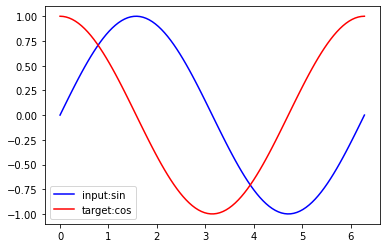

In [ ]:
steps = np.linspace(0,np.pi*2,100,dtype=np.float32)
input_x = np.sin(steps)
target_y = np.cos(steps)
plt.plot(steps,input_x,'b-',label='input:sin')
plt.plot(steps,target_y,'r-',label='target:cos')
plt.legend(loc='best')
plt.show()

In [ ]:
class LSTM(nn.Module):
  def __init__(self,INPUT_SIZE):
    super(LSTM,self).__init__()

    self.lstm = nn.LSTM(
        input_size = INPUT_SIZE,
        hidden_size = 20,
        batch_first = True,
    )
    self.out = nn.Linear(20,1)

  def forward(self,x,h_state,c_state):
    r_out,(h_state,c_state) = self.lstm(x,(h_state,c_state))
    outputs = self.out(r_out[0,:]).unsqueeze(0)
    return outputs,(h_state,c_state)
  
  def InitHidden(self):
    h_state = torch.randn(1,1,20)
    c_state = torch.randn(1,1,20)

    return h_state,c_state



In [ ]:
lstm = LSTM(INPUT_SIZE=1)
optimizer = optim.Adam(lstm.parameters(),lr=0.001)
loss = nn.MSELoss()

In [ ]:
h_state,c_state = lstm.InitHidden()
plt.figure(1)
plt.ion()
h_state

tensor([[[-2.2596,  1.3941, -2.6668, -0.5135, -0.5737,  0.6151,  0.2157,
           0.7111,  1.3000,  0.4086,  0.6508,  0.2685,  0.1673, -1.9010,
          -1.6638, -1.2986, -0.0911, -0.5173, -0.0152, -0.7549]]])

<Figure size 432x288 with 0 Axes>

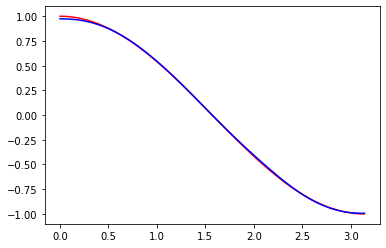

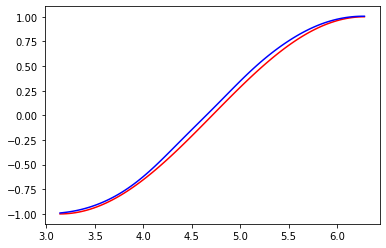

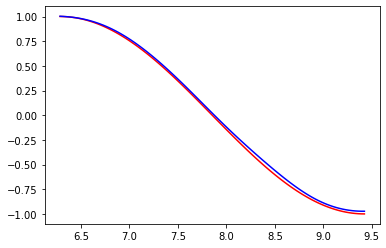

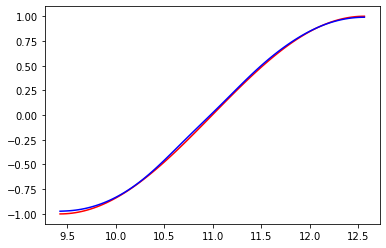

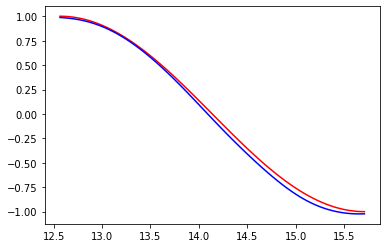

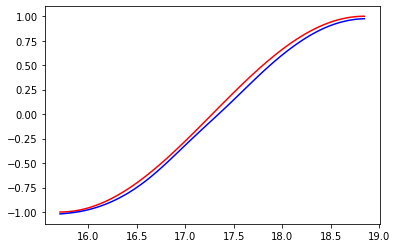

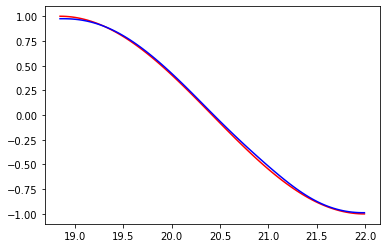

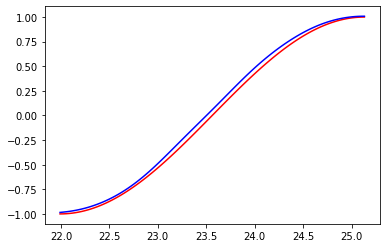

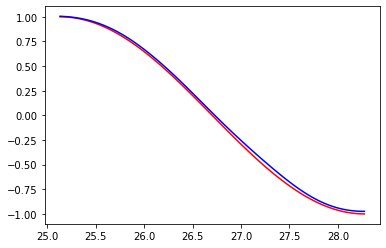

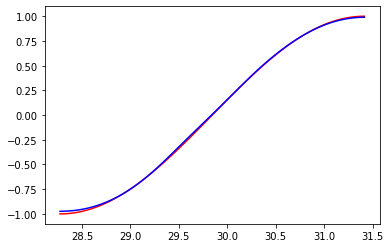

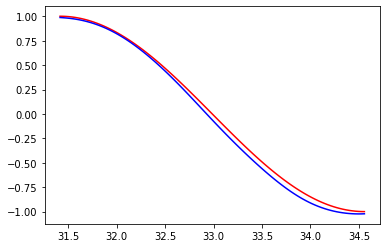

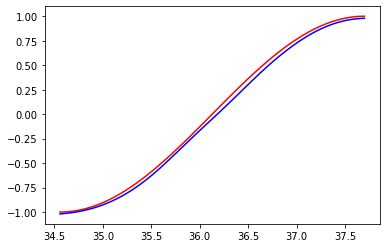

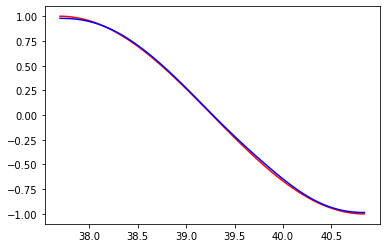

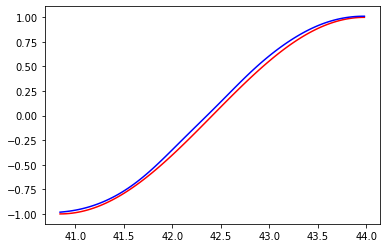

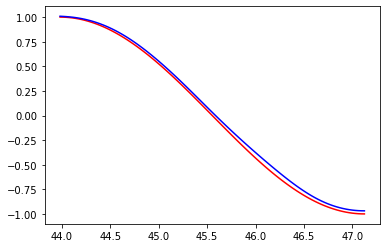

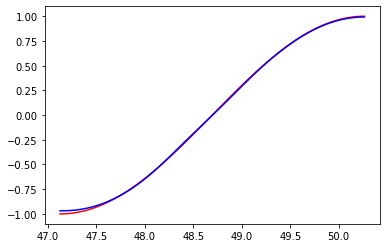

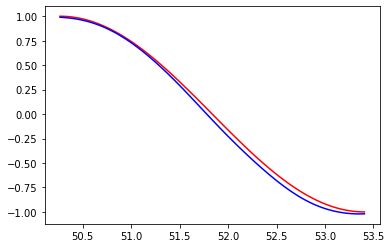

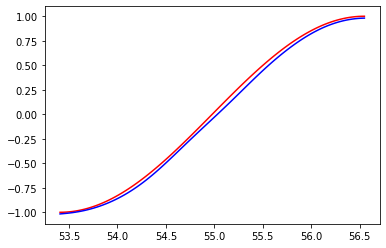

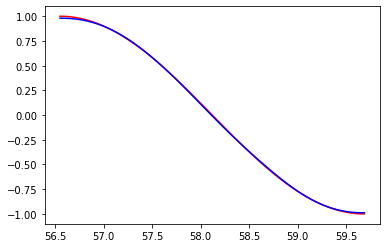

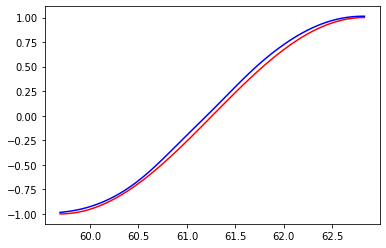

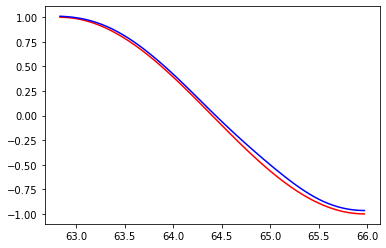

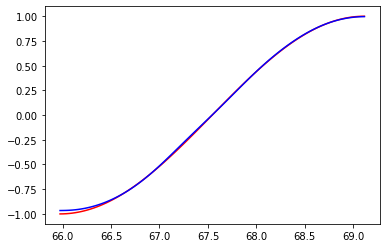

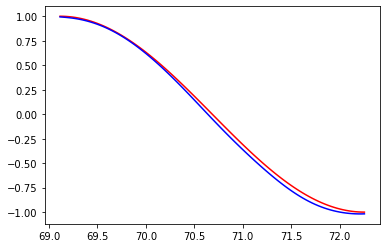

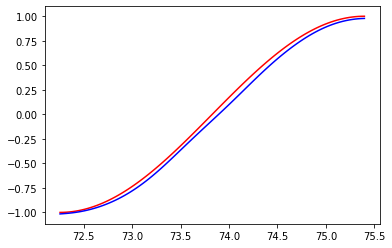

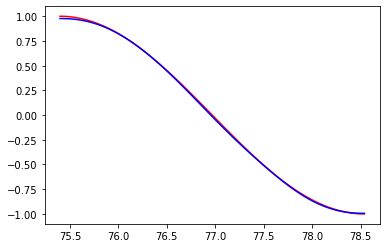

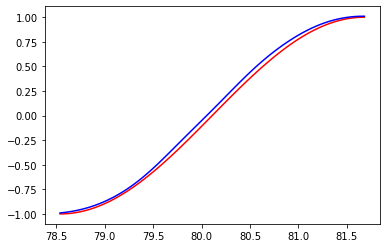

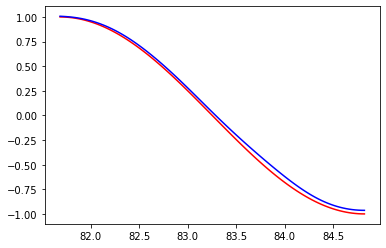

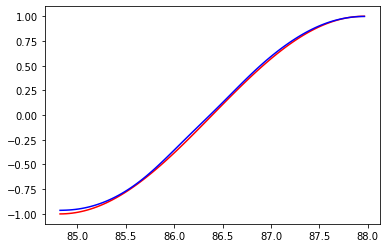

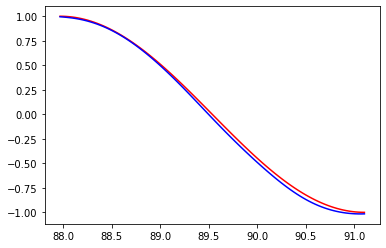

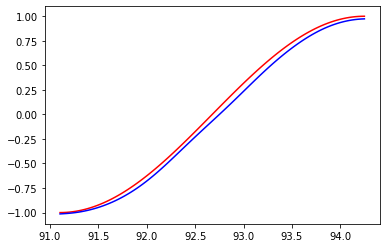

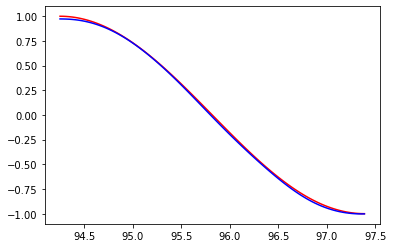

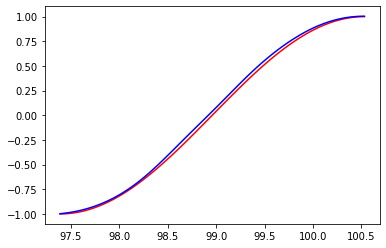

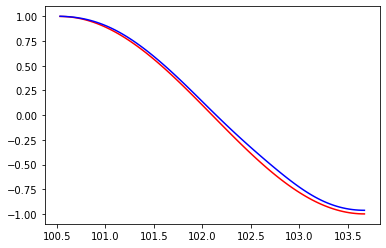

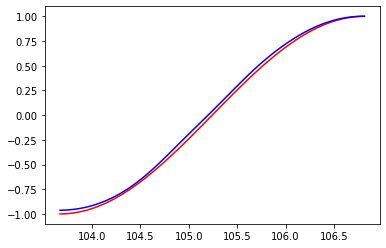

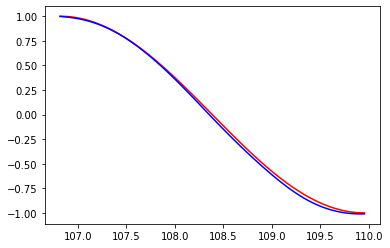

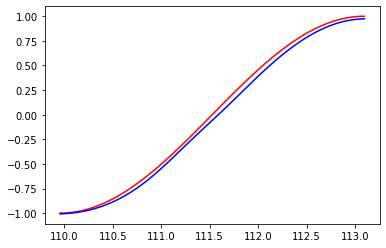

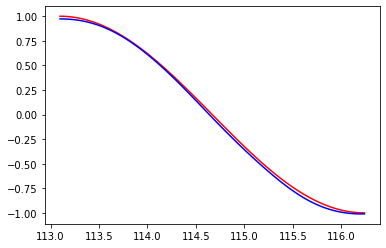

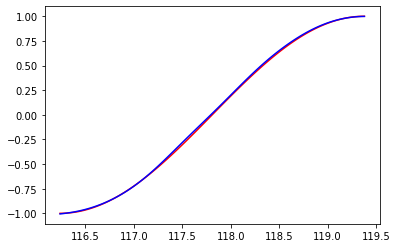

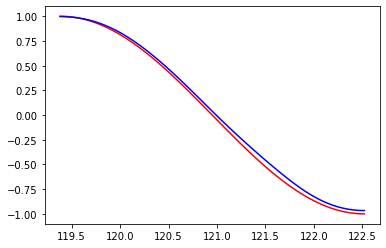

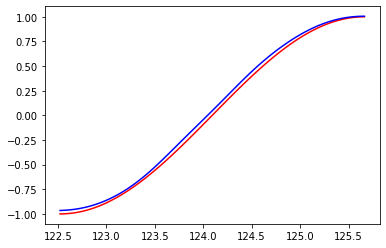

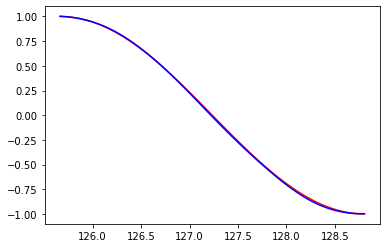

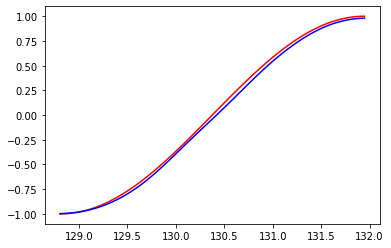

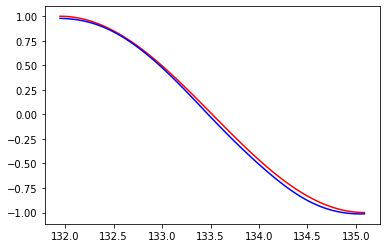

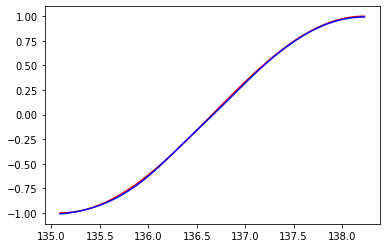

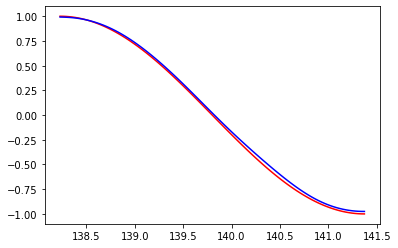

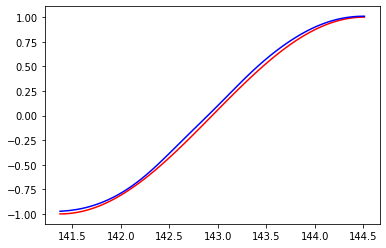

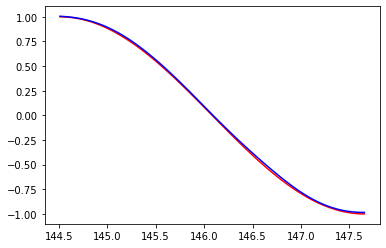

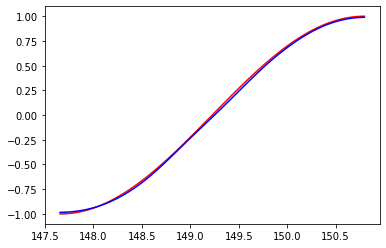

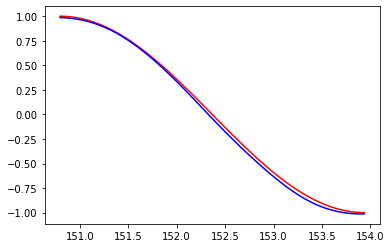

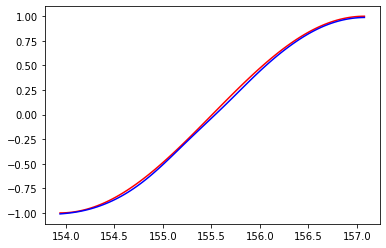

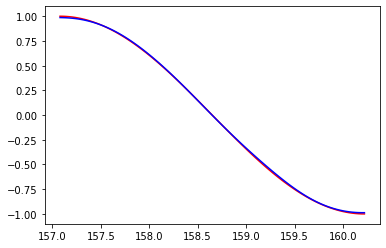

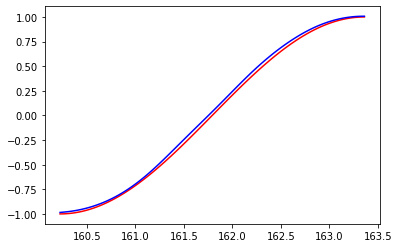

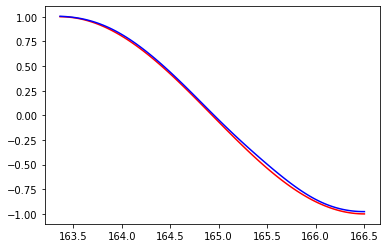

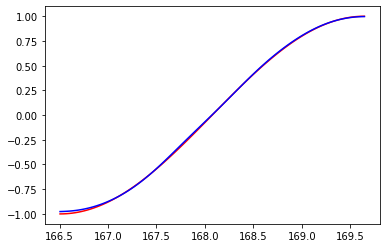

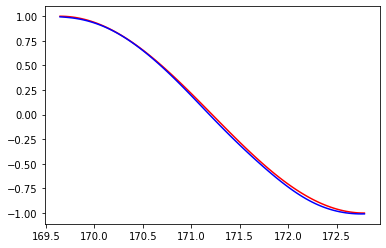

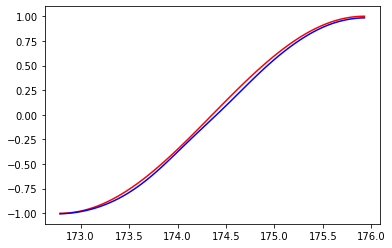

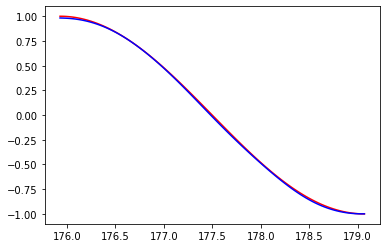

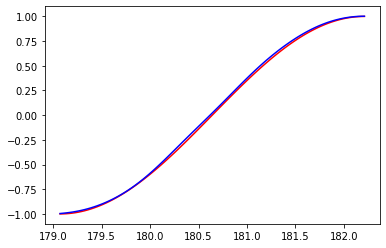

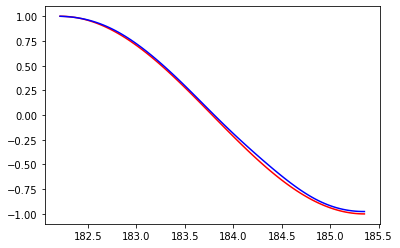

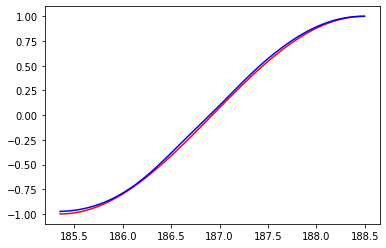

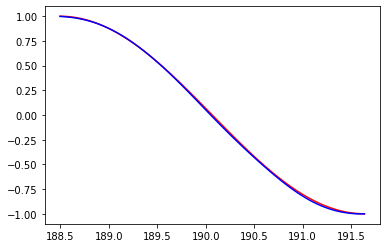

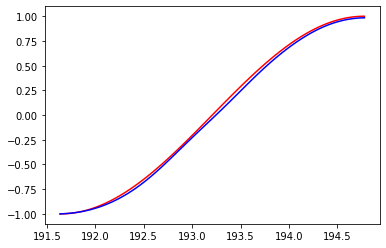

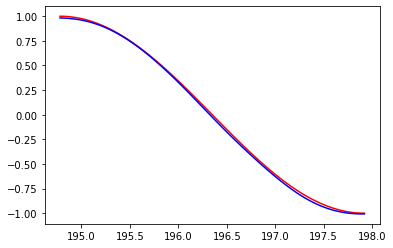

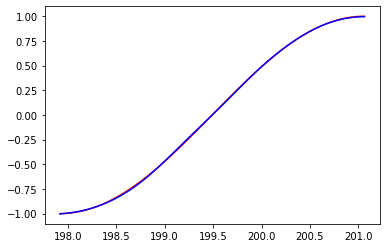

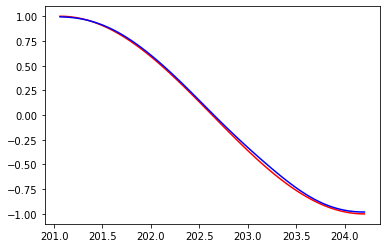

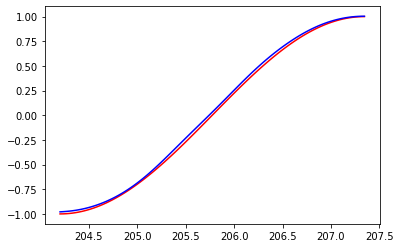

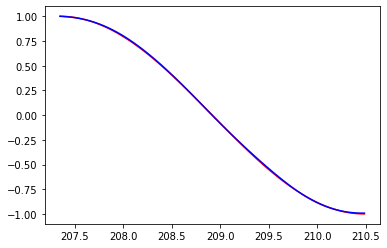

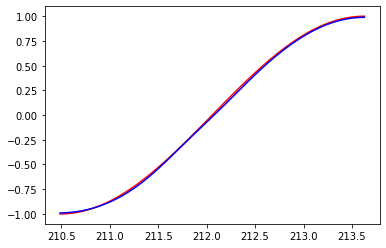

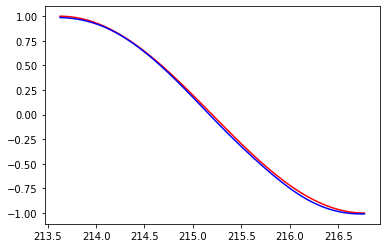

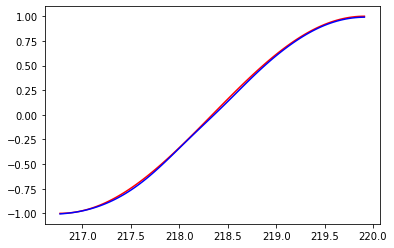

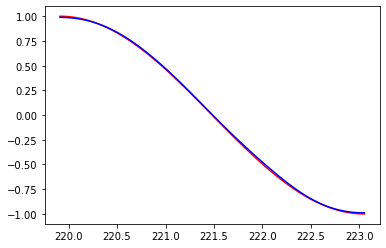

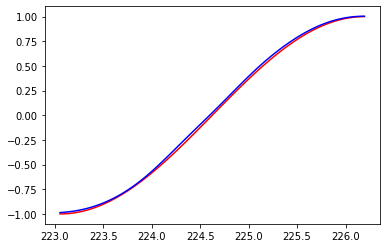

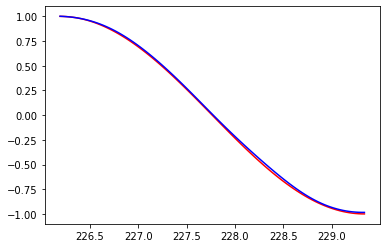

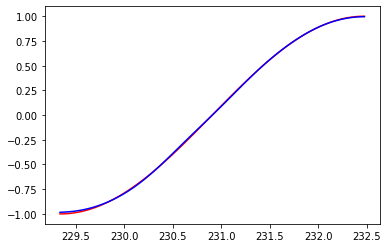

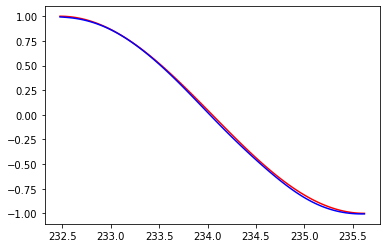

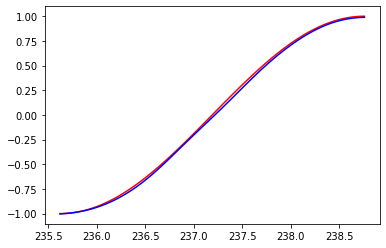

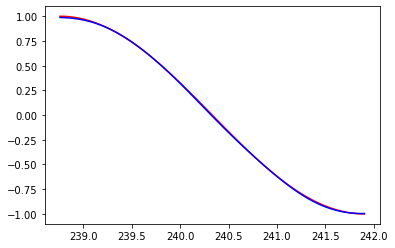

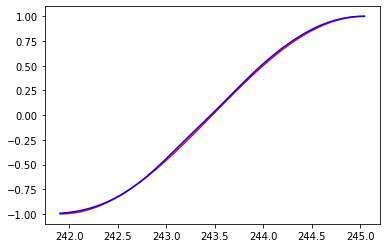

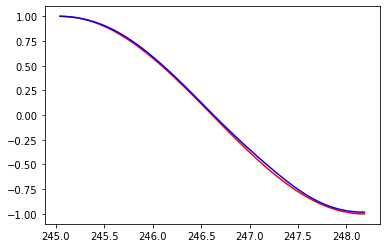

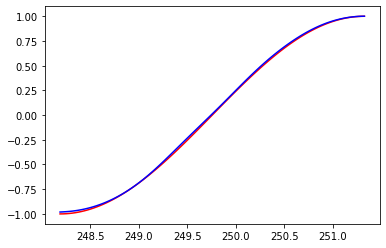

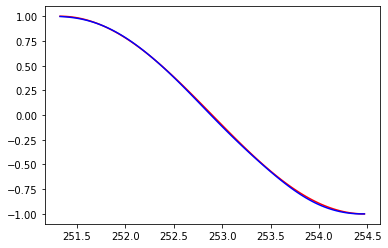

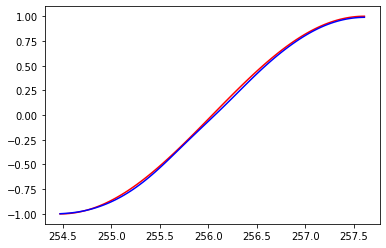

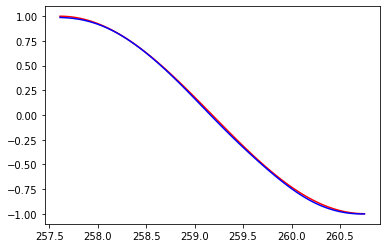

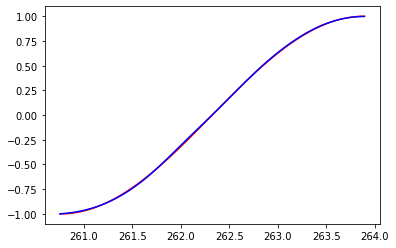

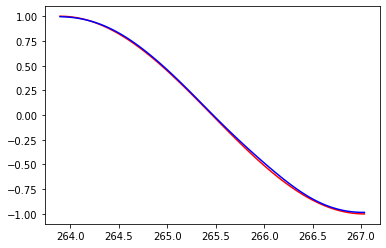

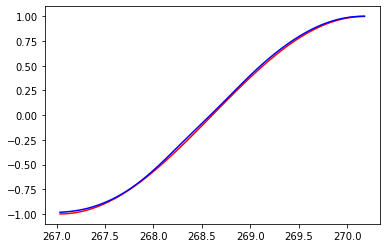

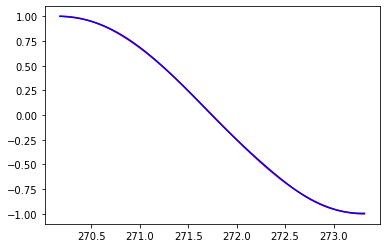

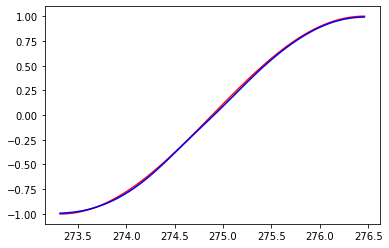

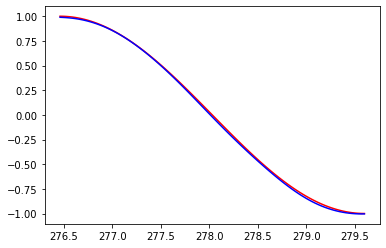

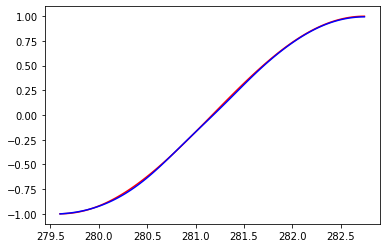

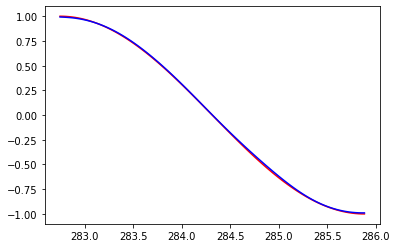

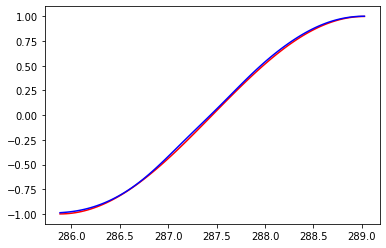

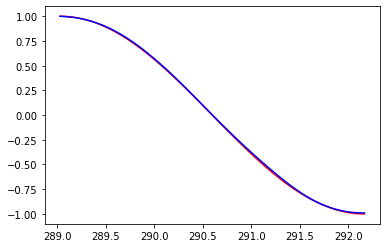

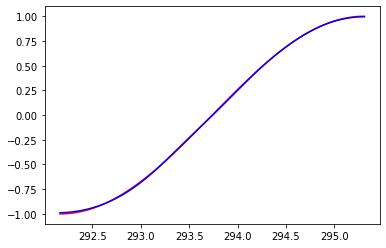

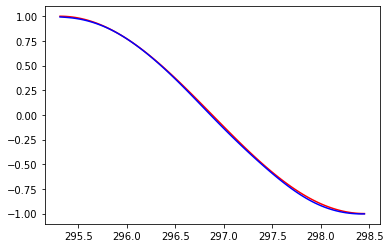

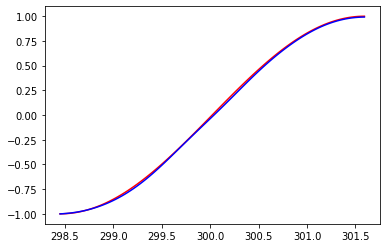

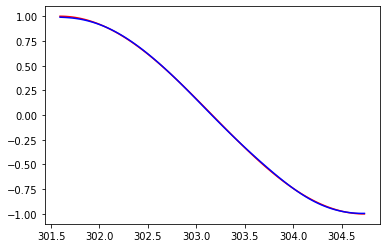

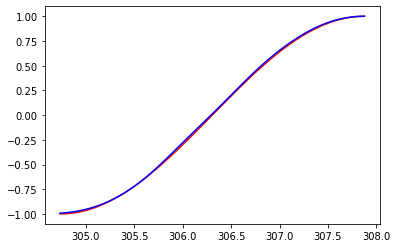

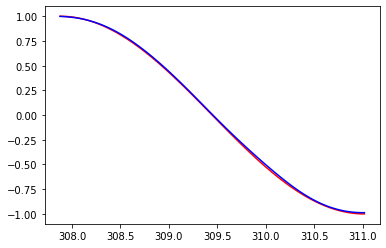

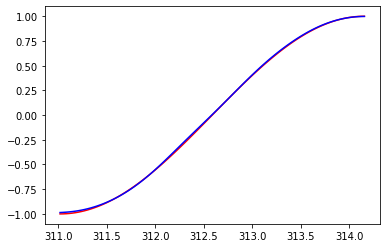

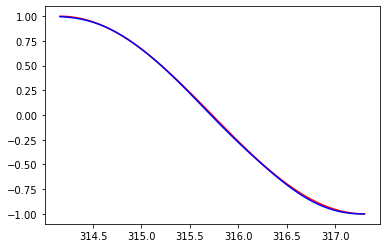

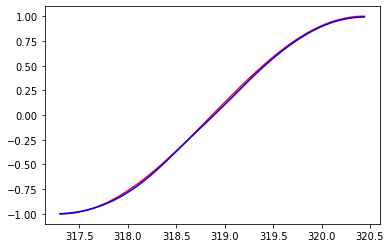

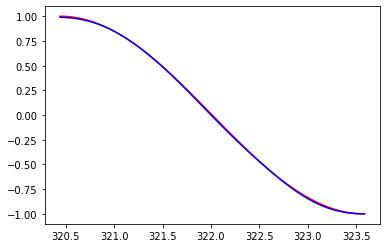

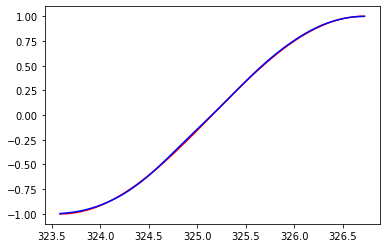

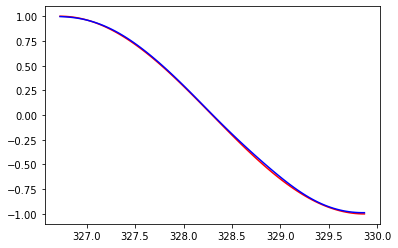

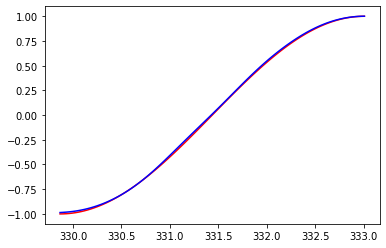

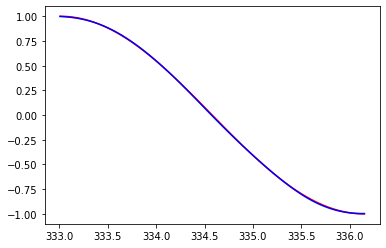

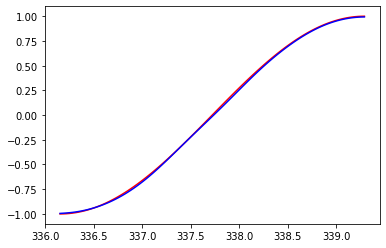

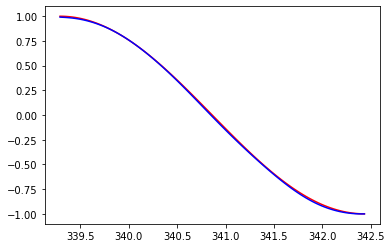

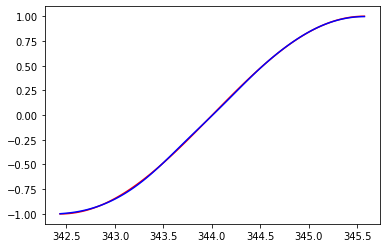

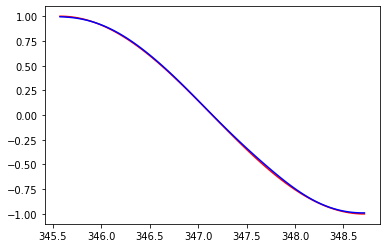

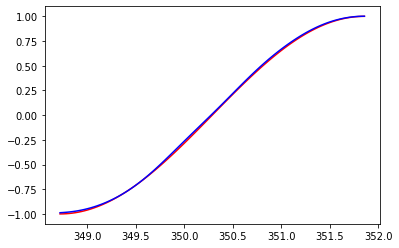

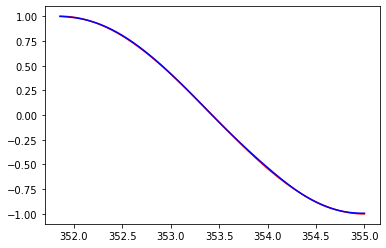

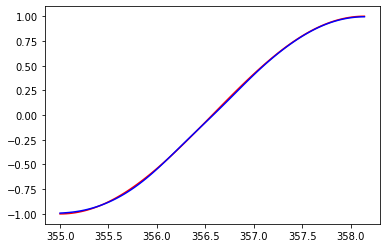

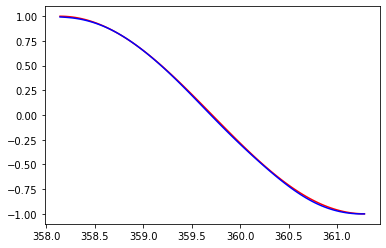

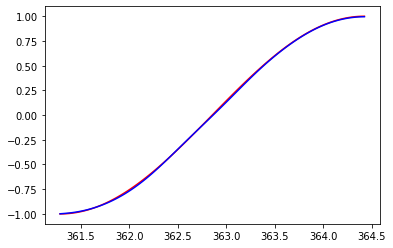

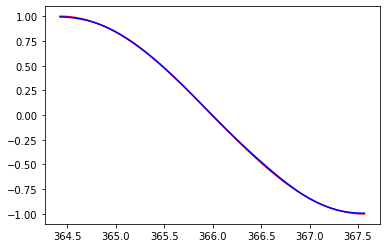

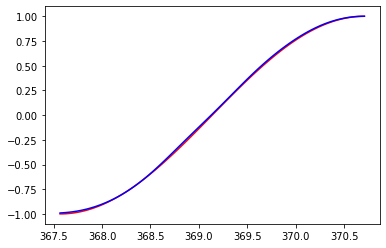

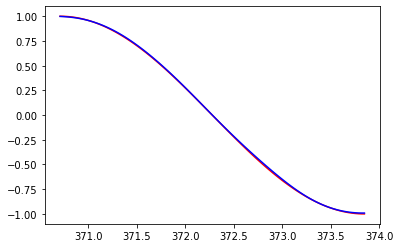

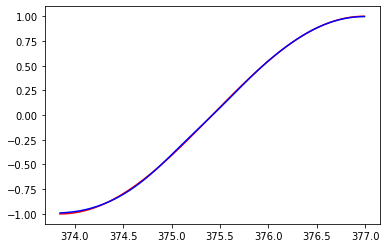

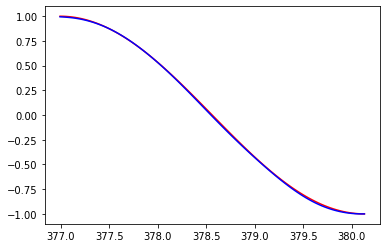

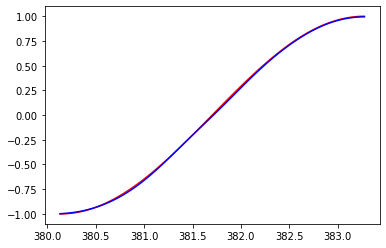

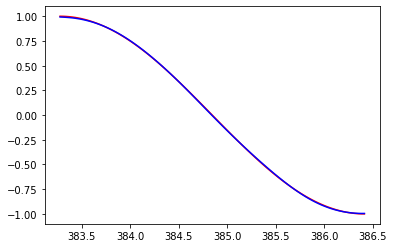

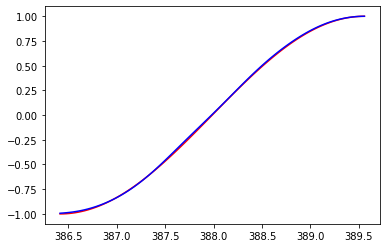

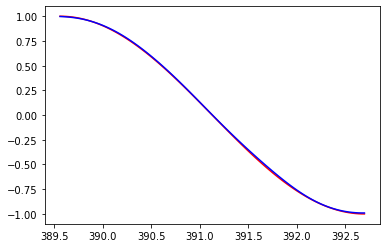

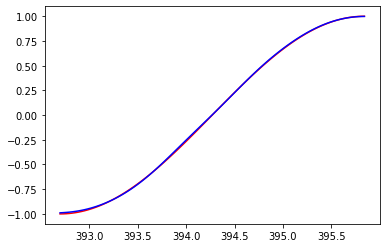

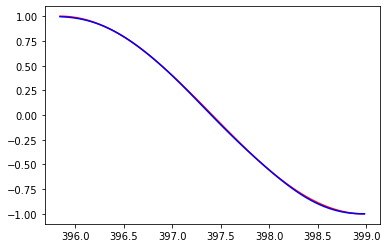

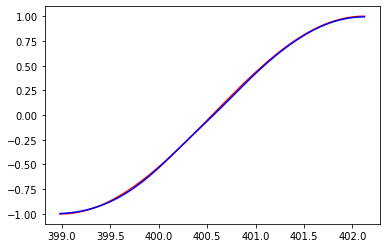

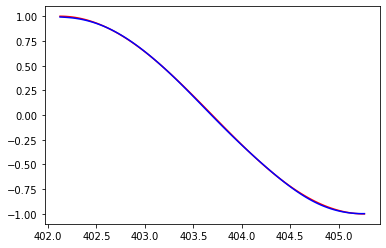

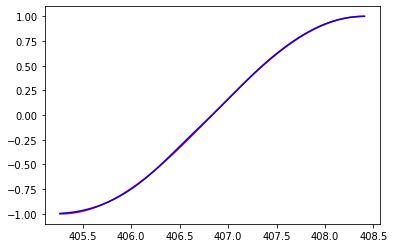

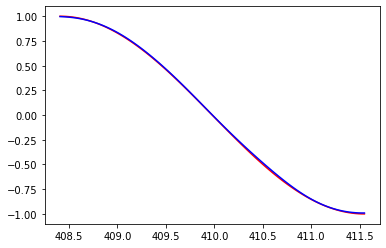

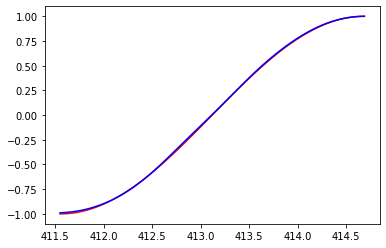

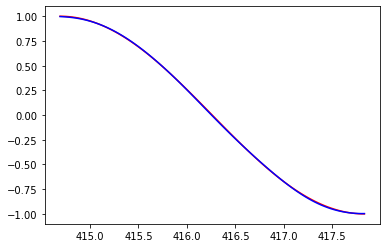

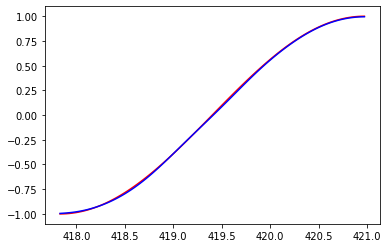

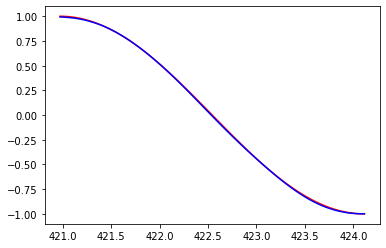

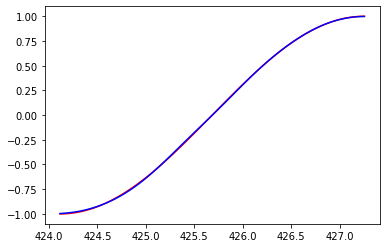

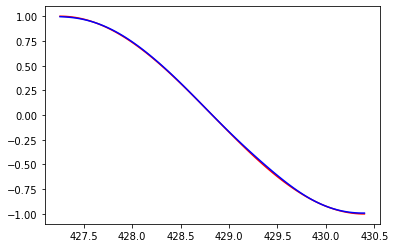

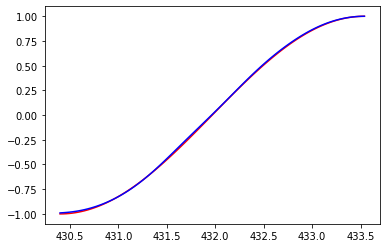

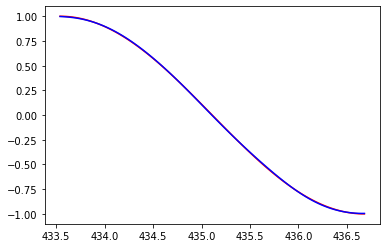

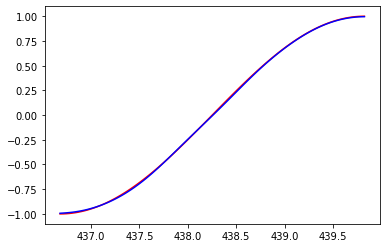

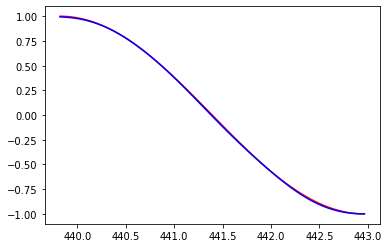

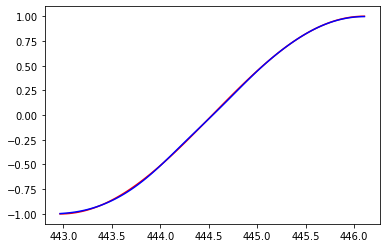

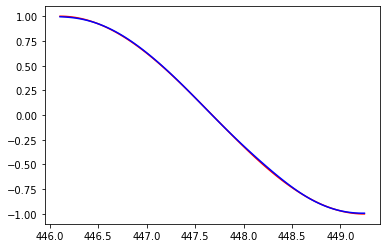

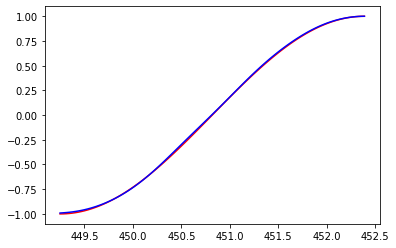

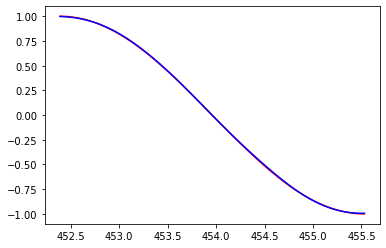

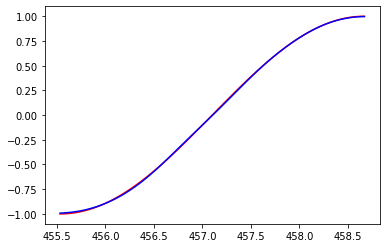

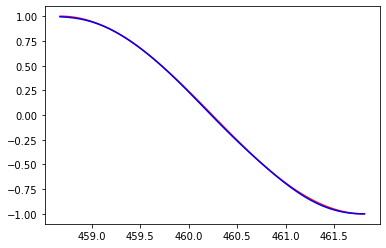

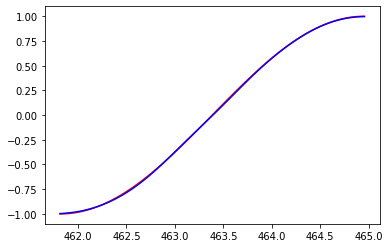

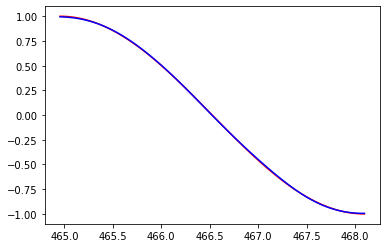

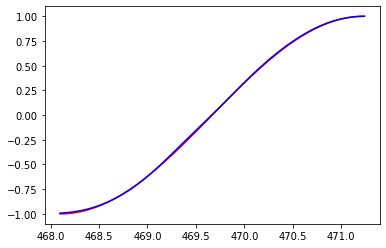

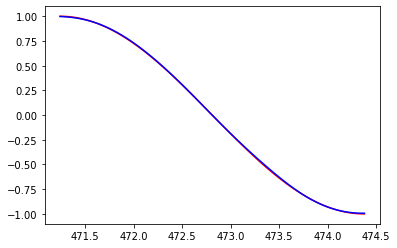

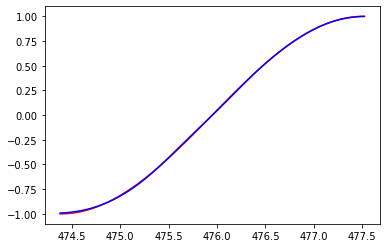

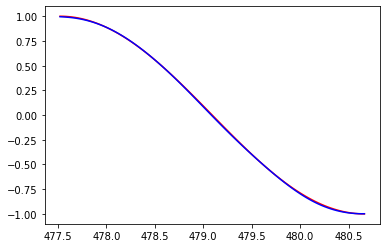

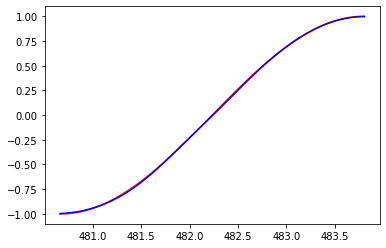

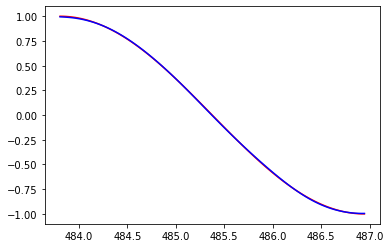

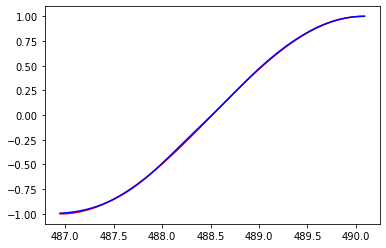

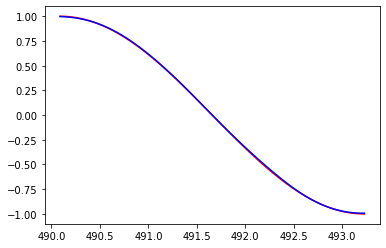

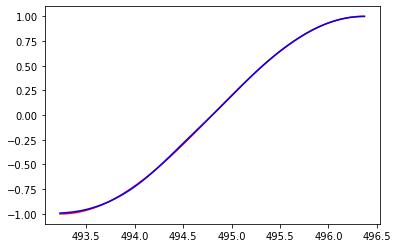

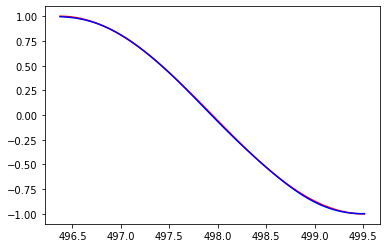

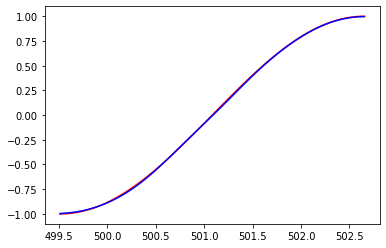

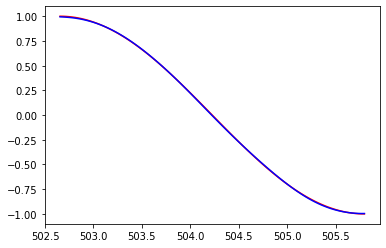

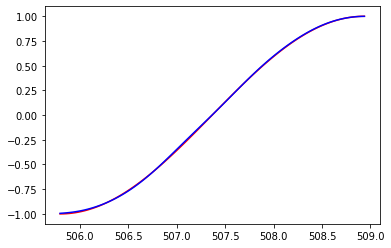

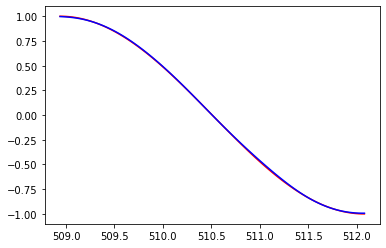

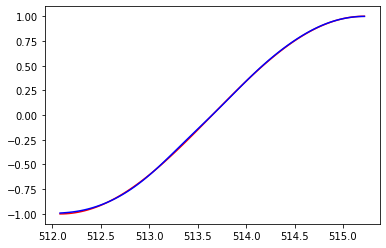

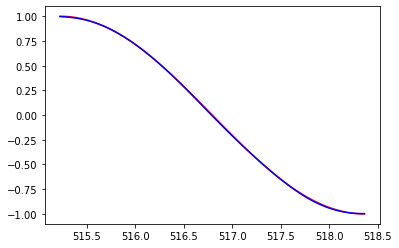

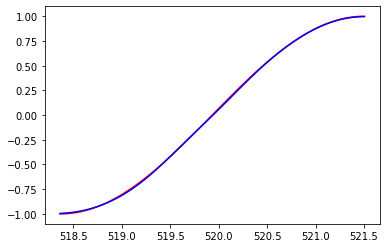

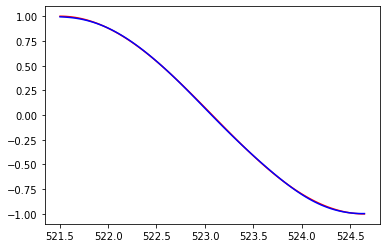

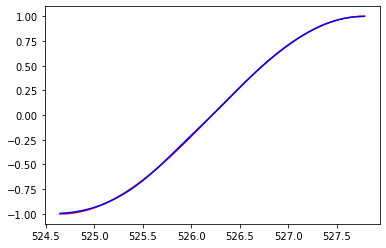

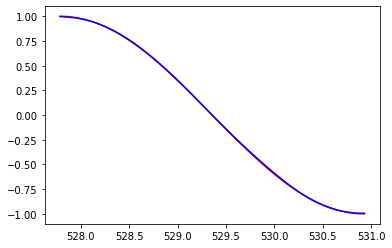

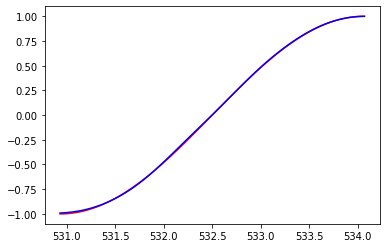

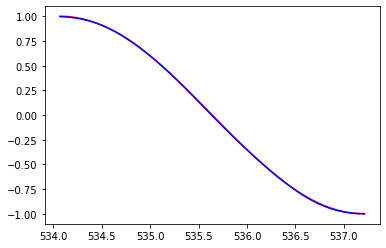

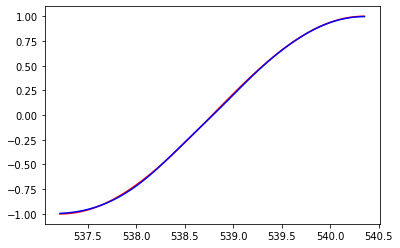

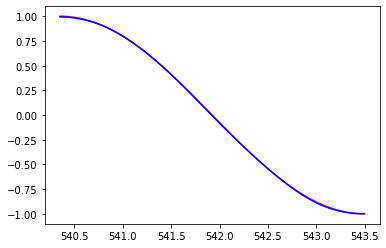

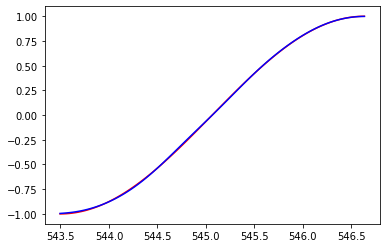

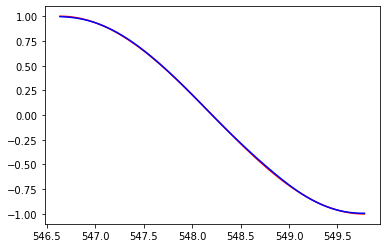

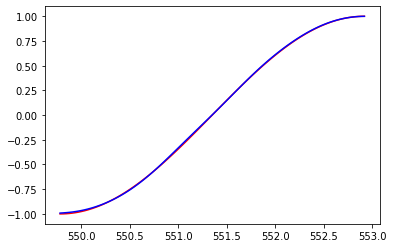

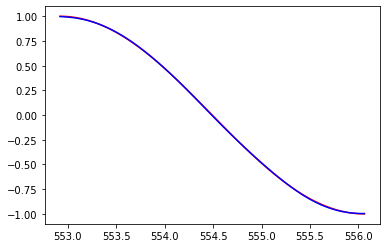

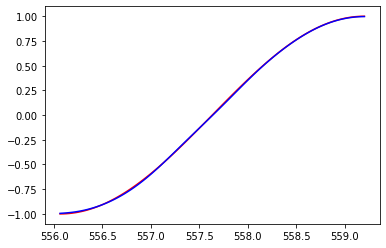

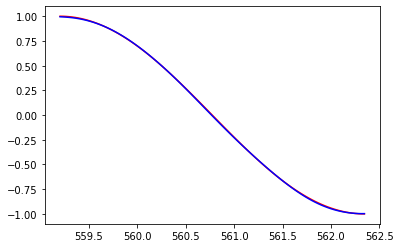

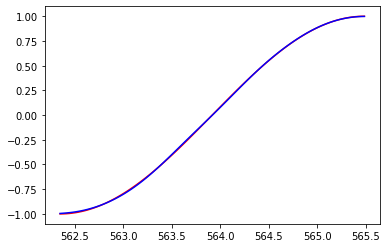

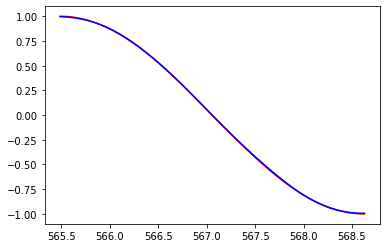

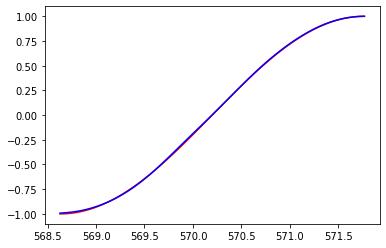

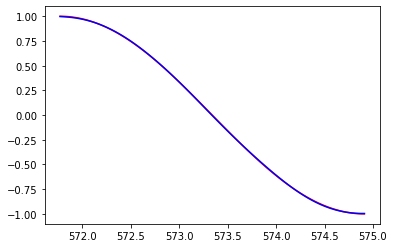

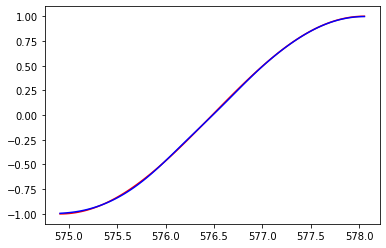

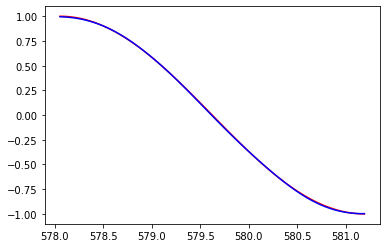

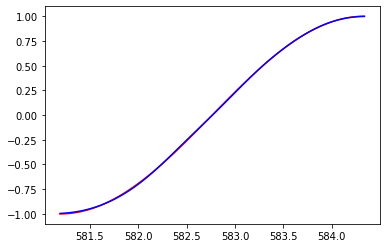

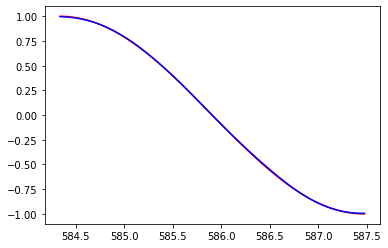

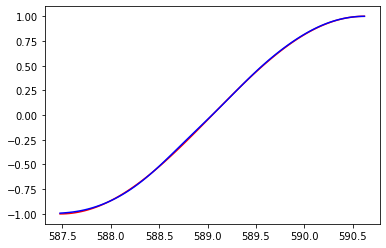

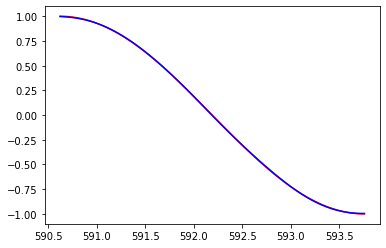

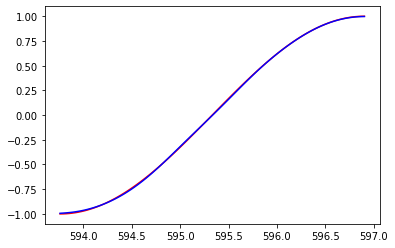

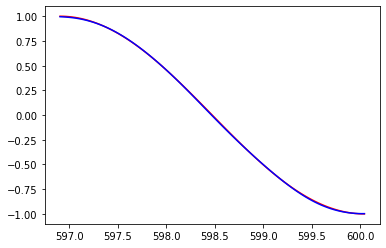

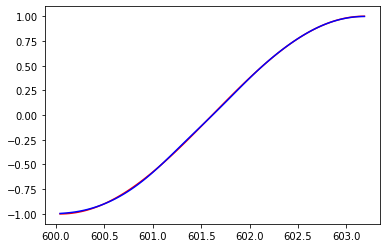

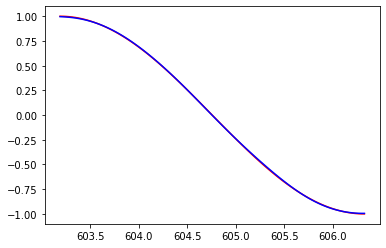

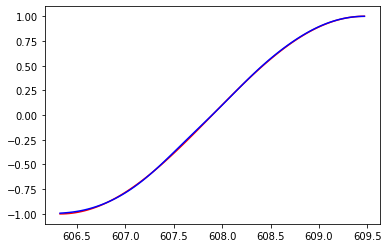

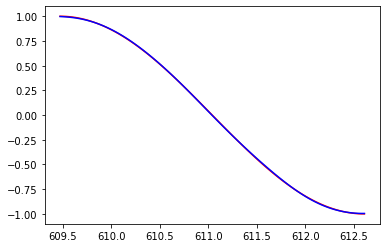

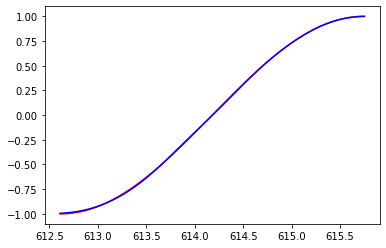

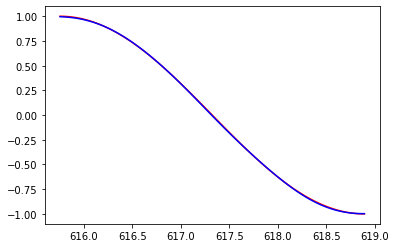

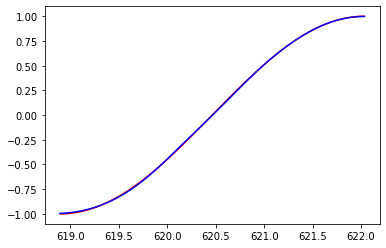

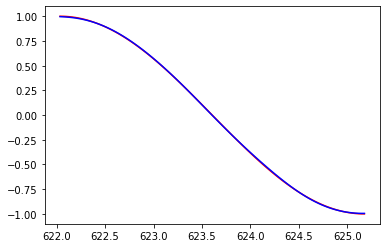

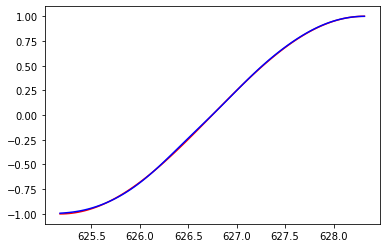

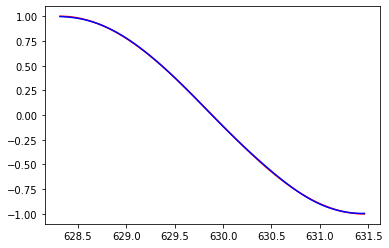

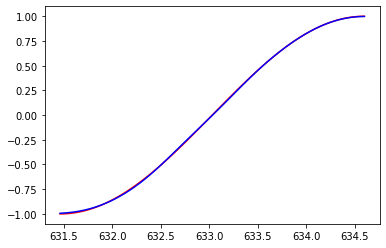

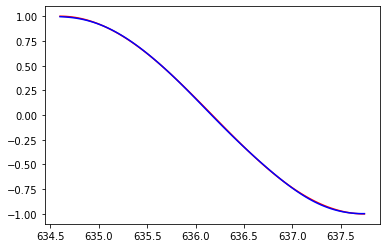

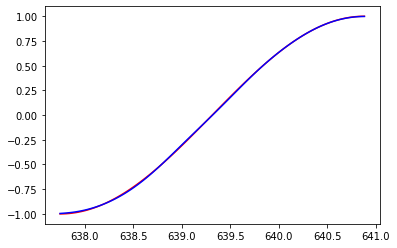

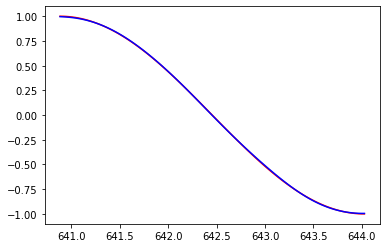

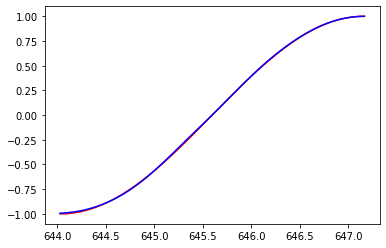

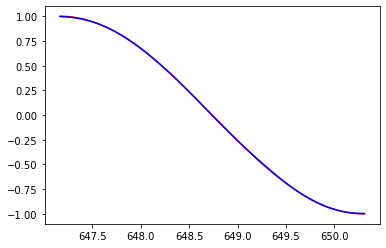

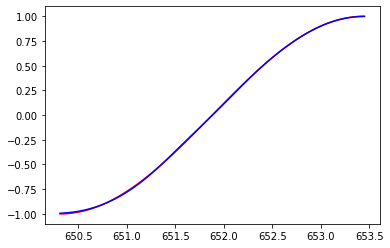

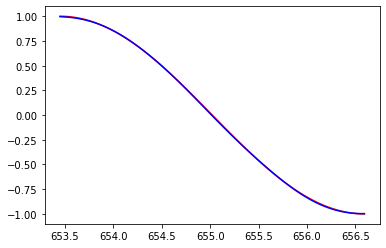

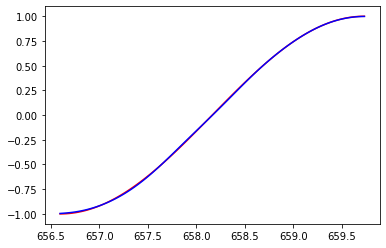

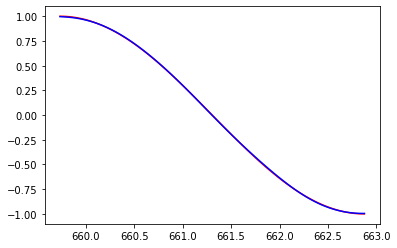

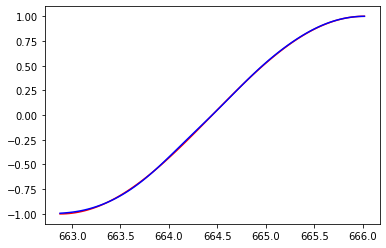

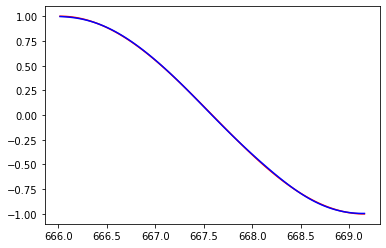

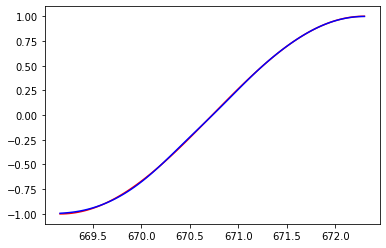

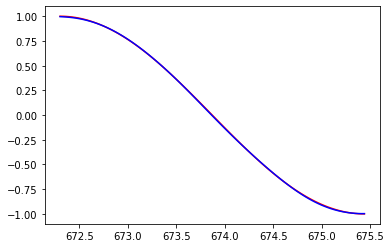

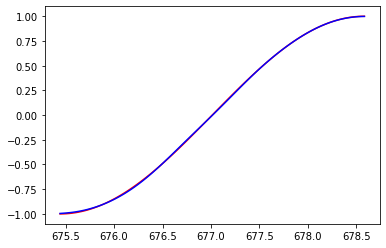

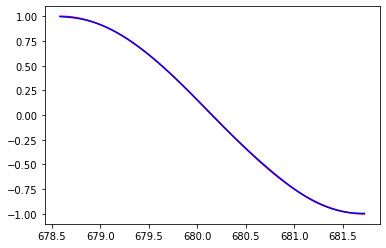

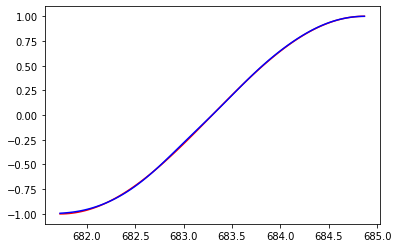

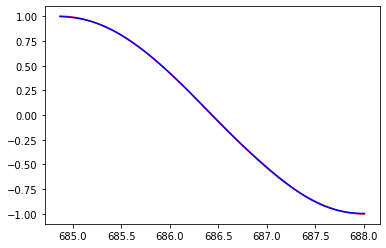

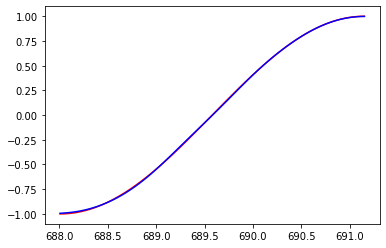

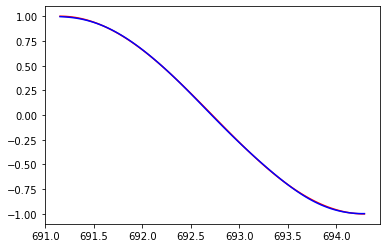

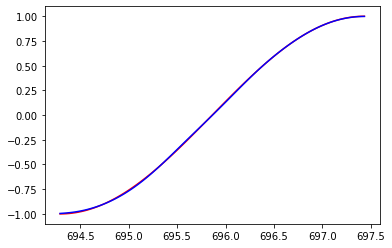

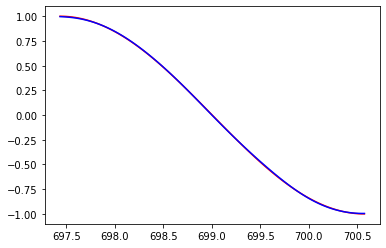

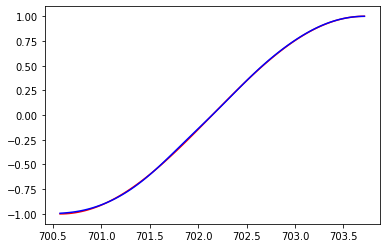

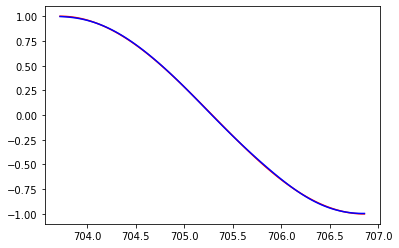

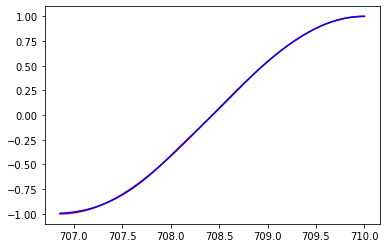

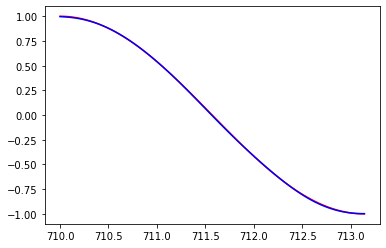

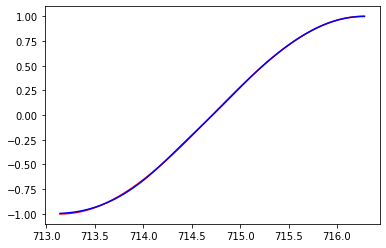

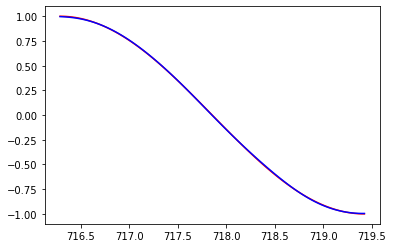

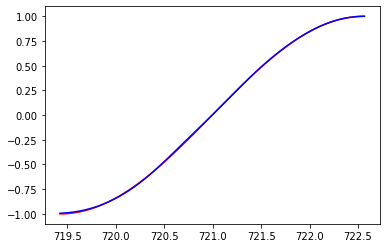

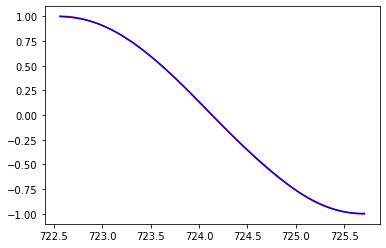

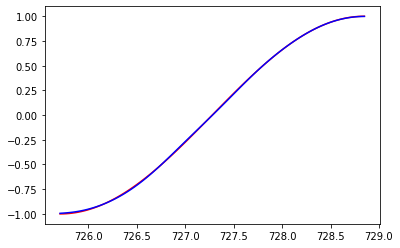

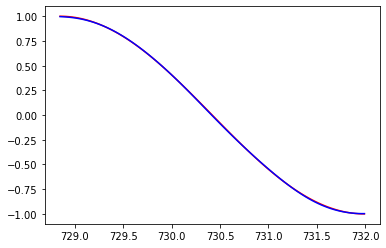

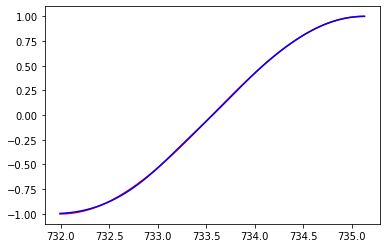

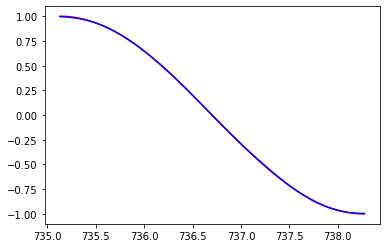

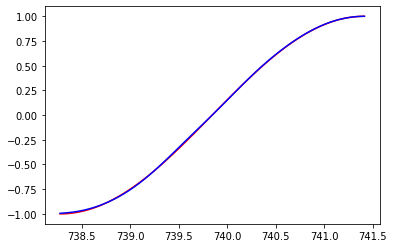

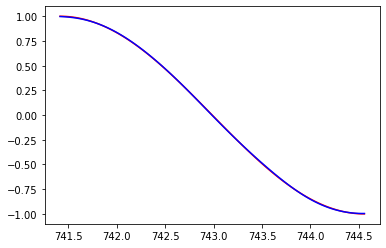

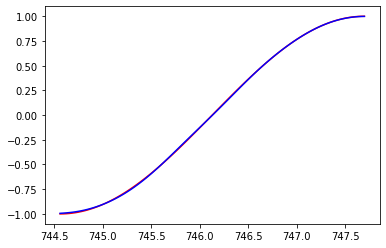

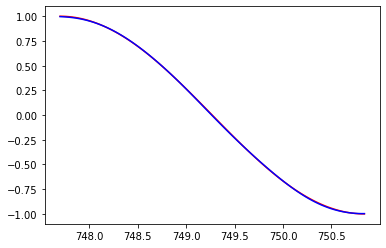

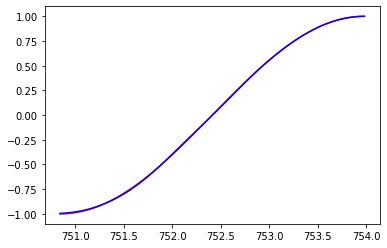

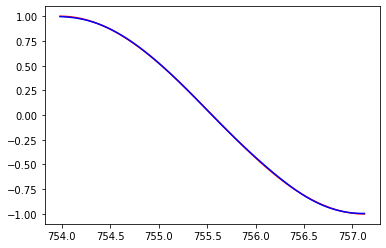

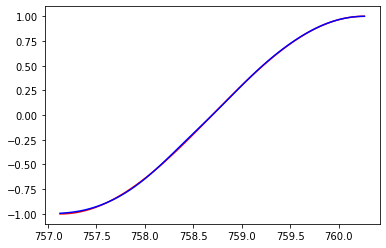

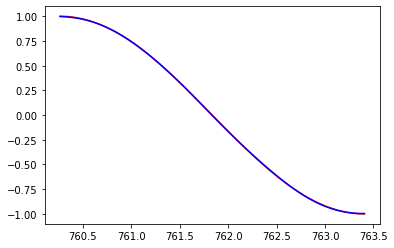

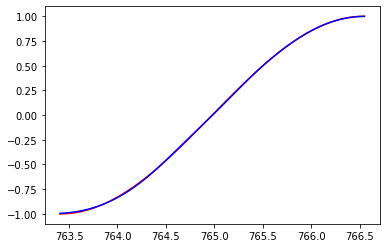

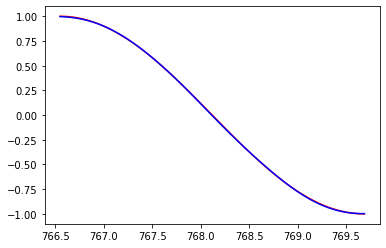

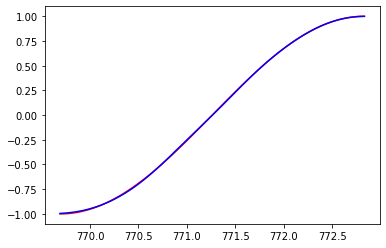

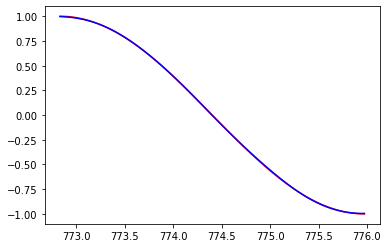

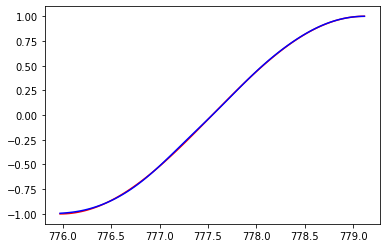

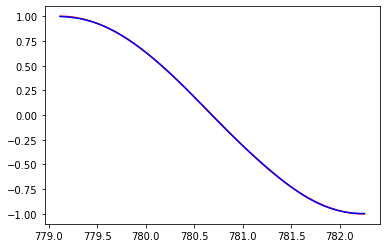

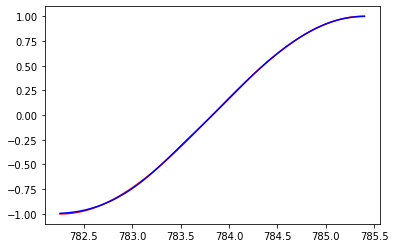

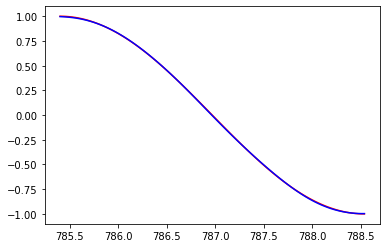

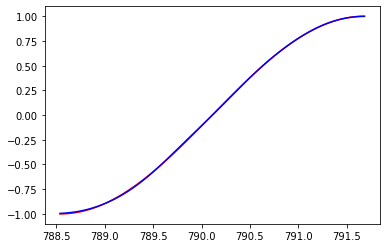

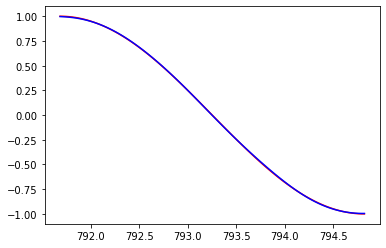

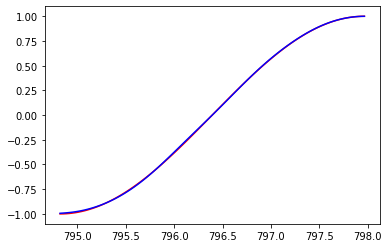

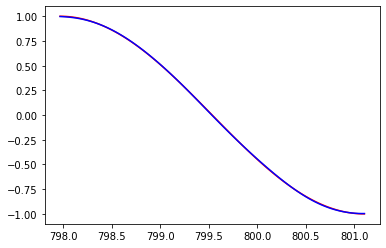

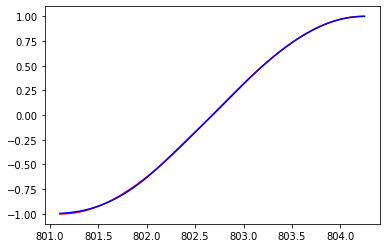

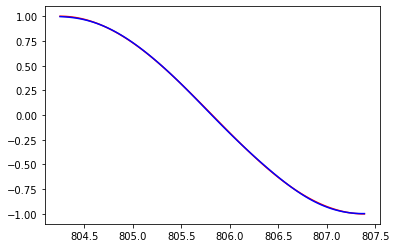

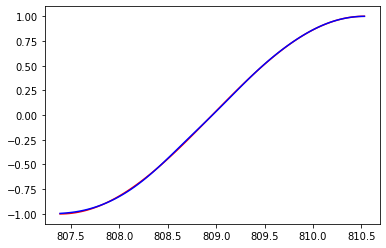

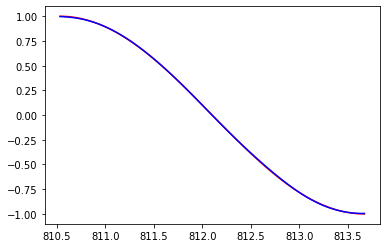

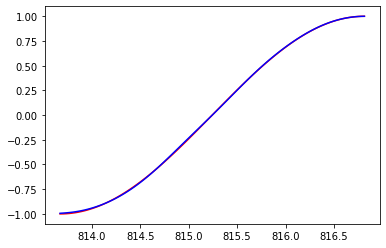

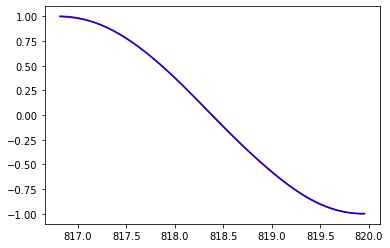

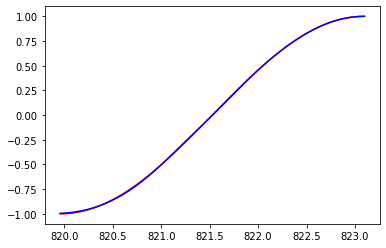

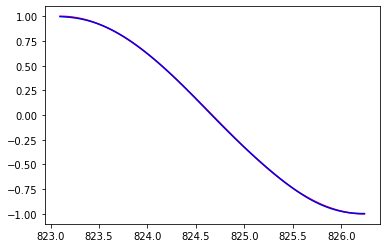

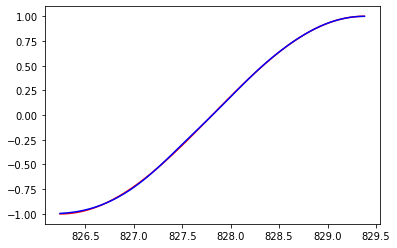

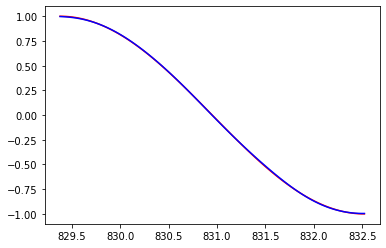

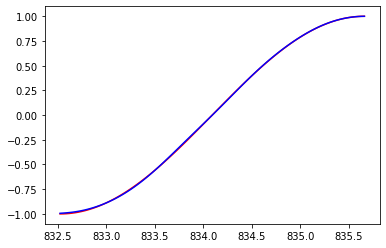

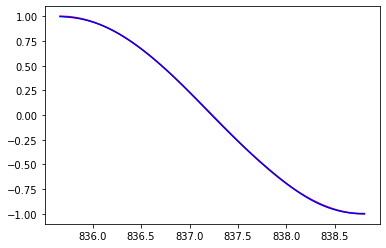

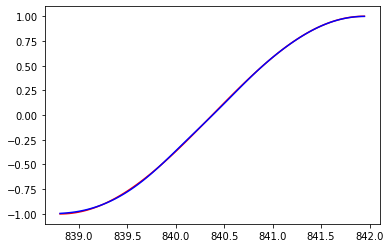

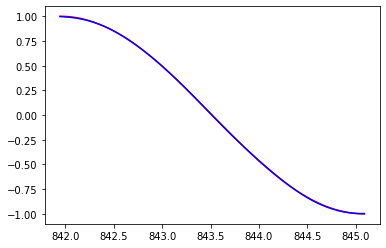

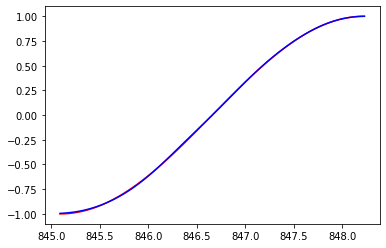

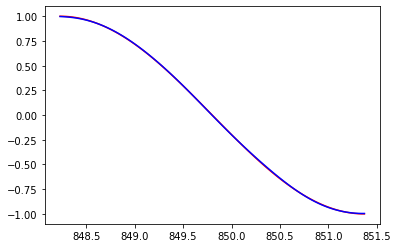

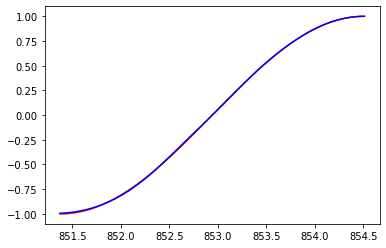

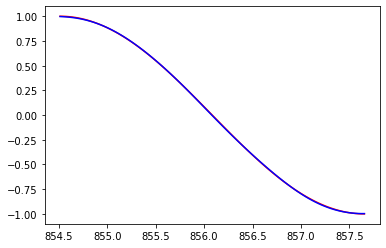

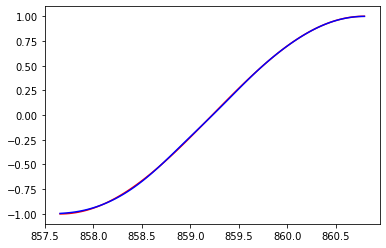

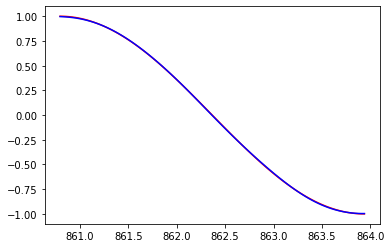

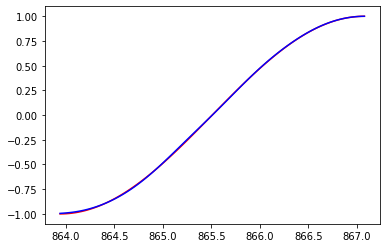

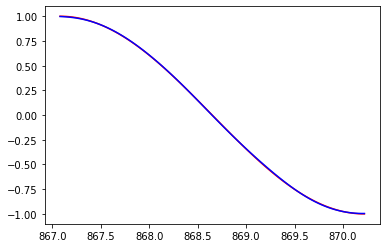

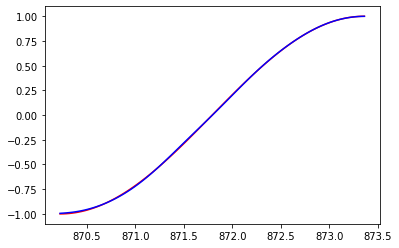

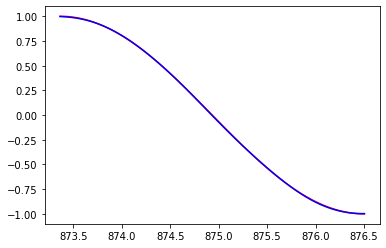

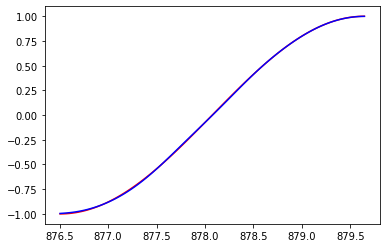

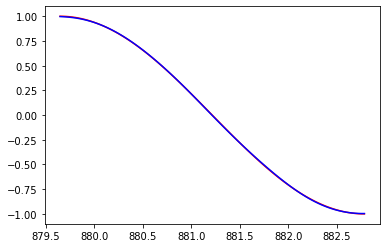

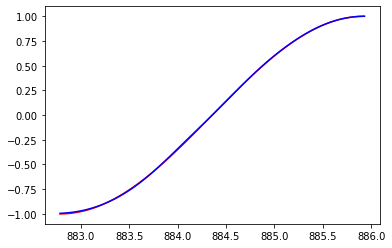

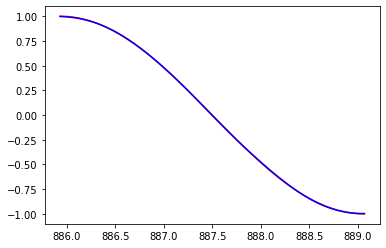

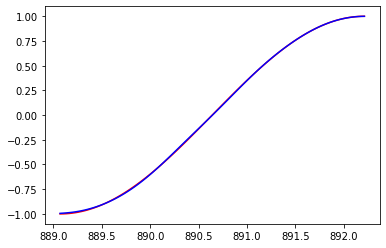

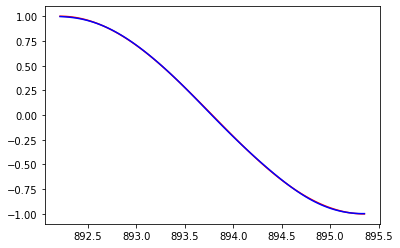

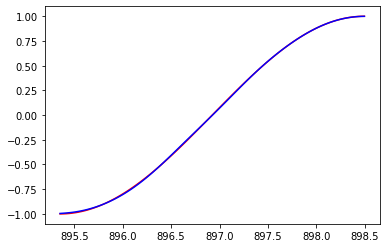

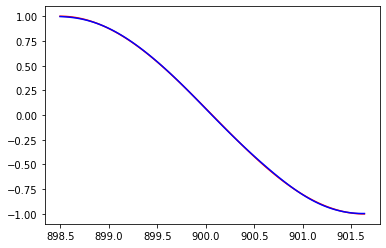

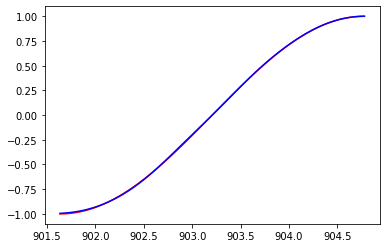

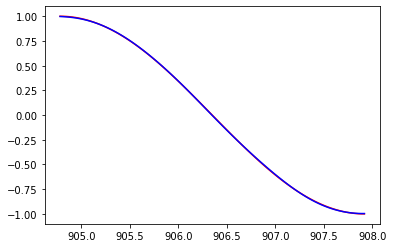

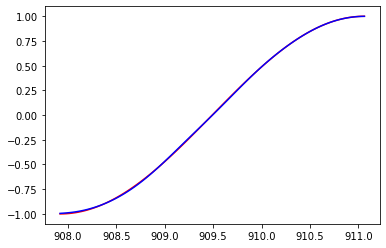

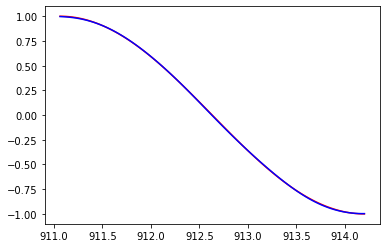

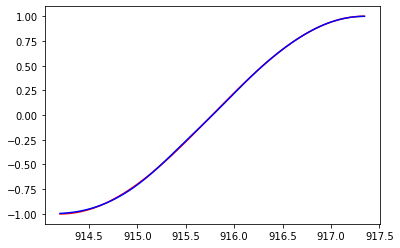

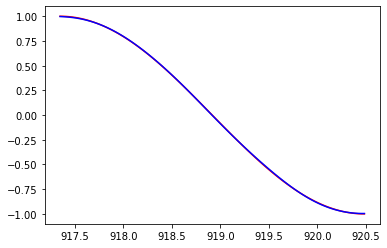

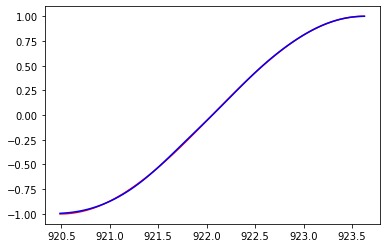

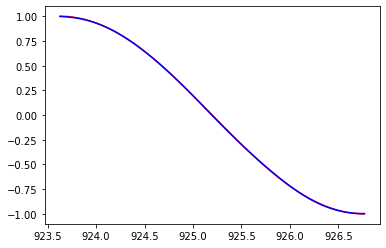

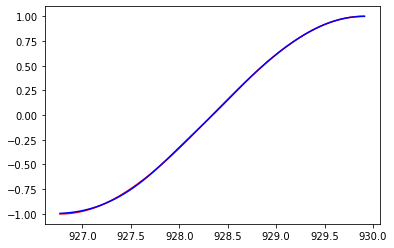

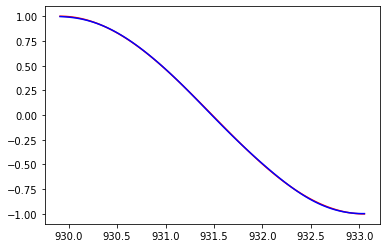

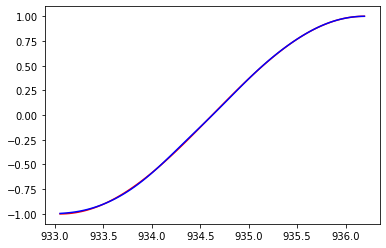

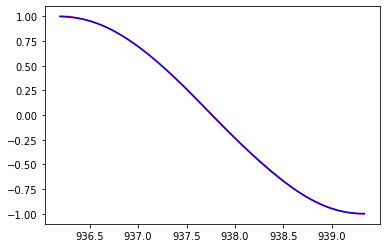

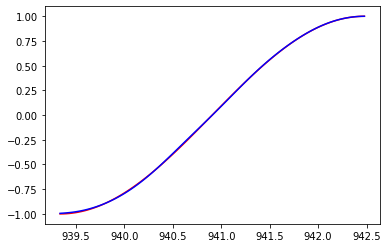

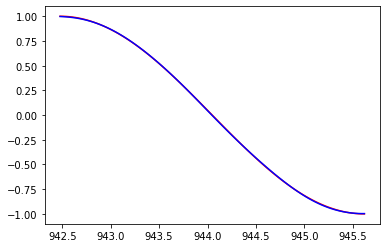

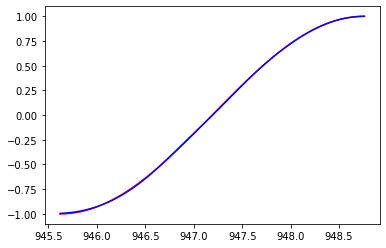

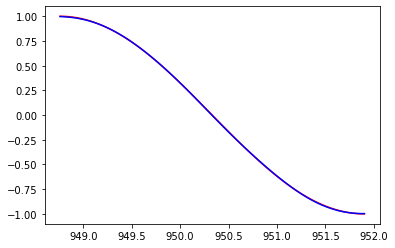

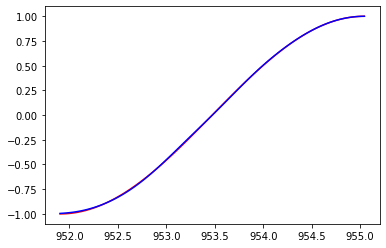

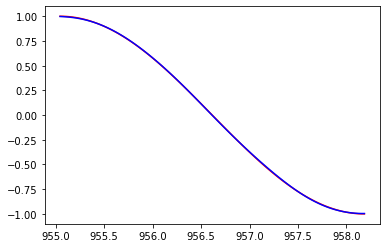

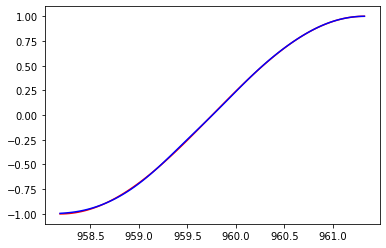

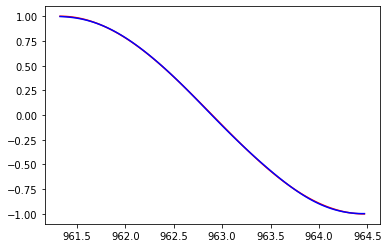

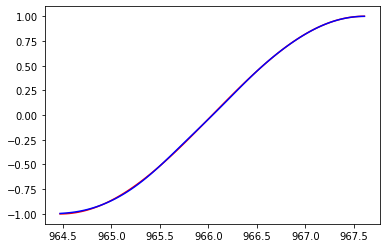

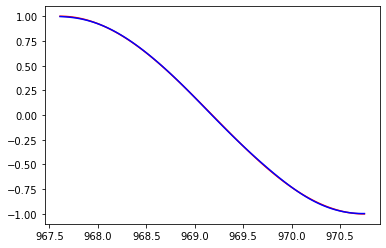

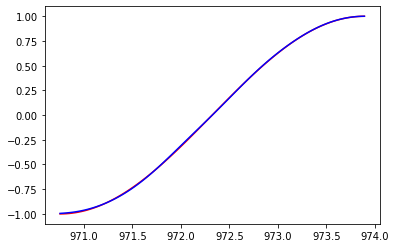

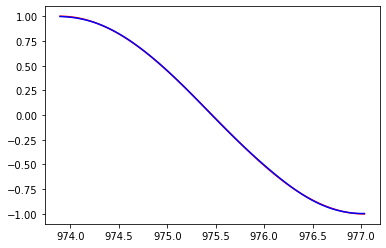

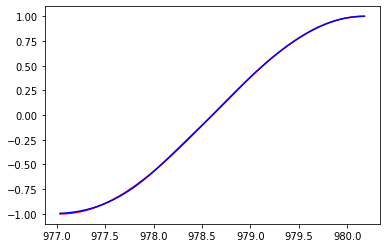

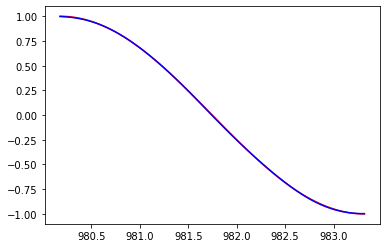

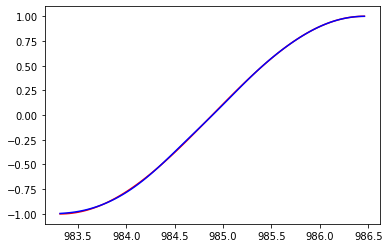

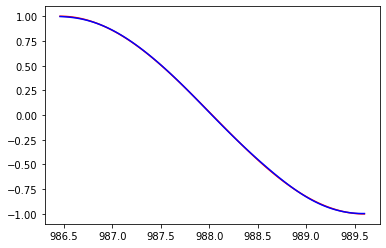

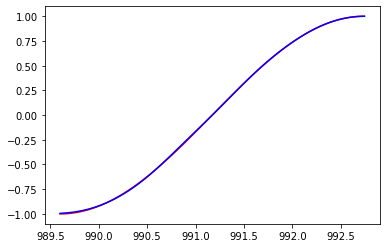

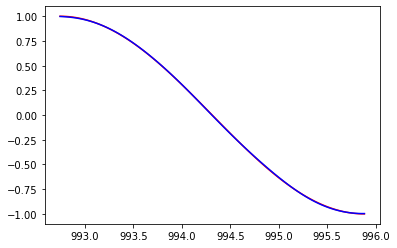

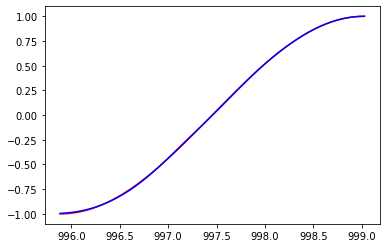

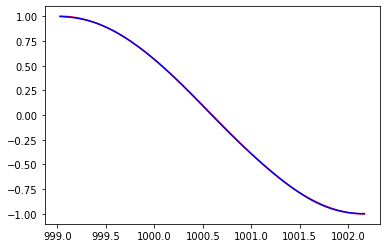

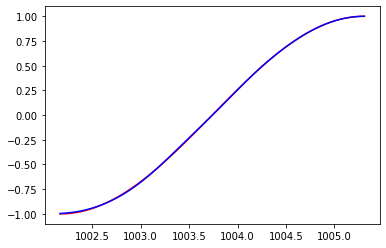

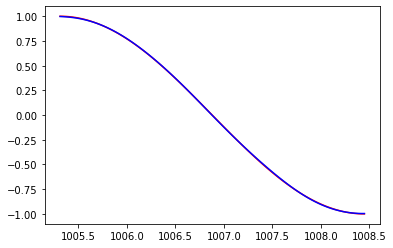

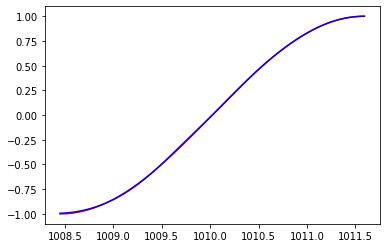

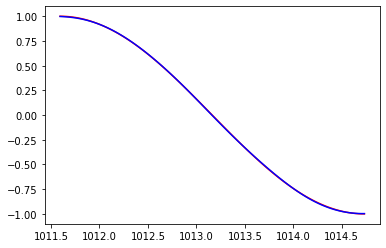

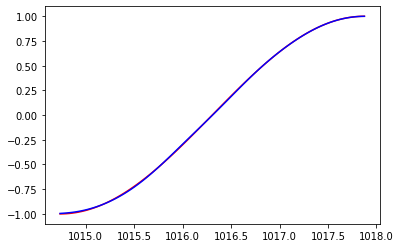

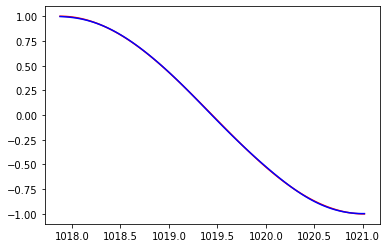

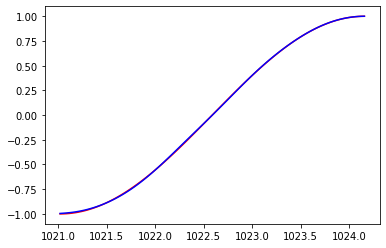

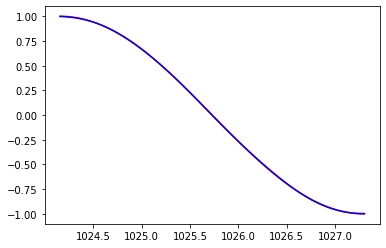

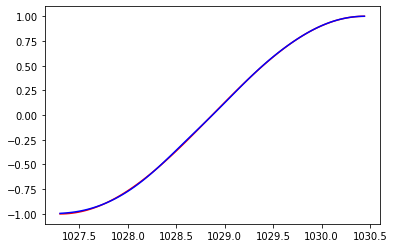

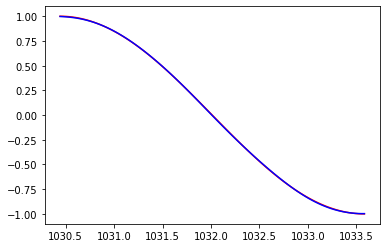

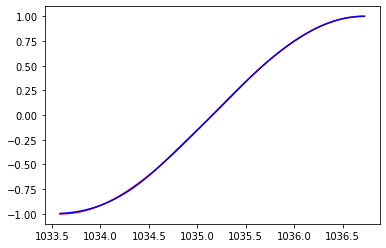

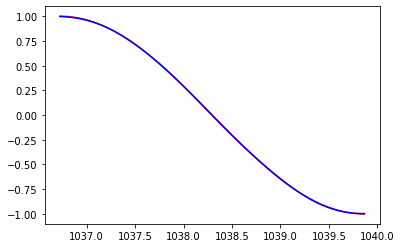

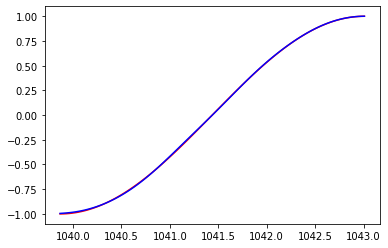

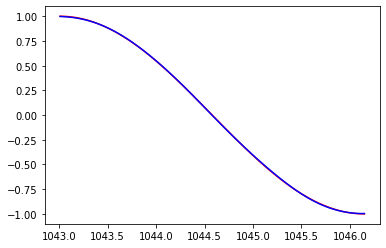

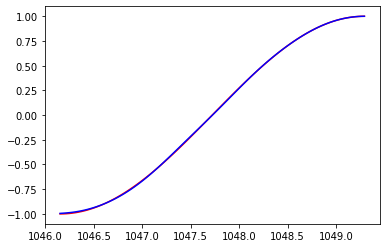

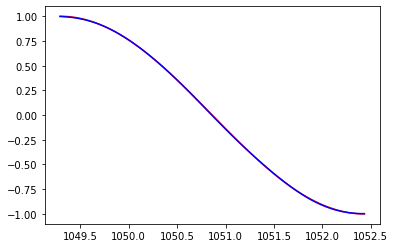

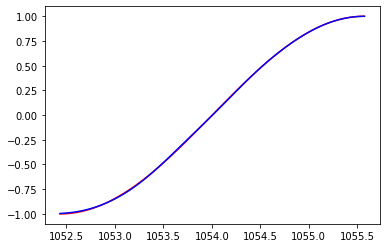

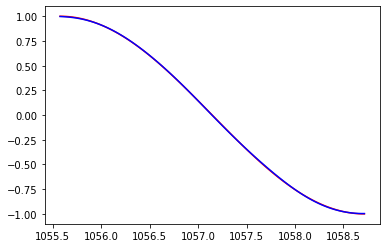

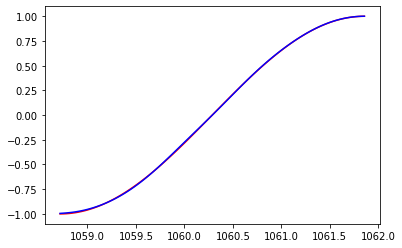

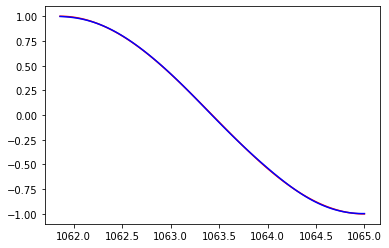

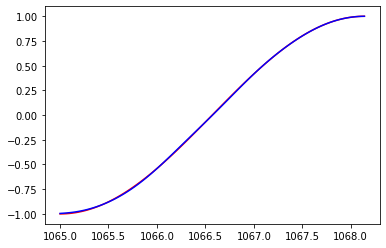

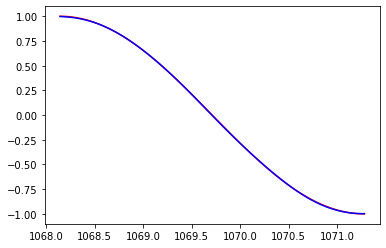

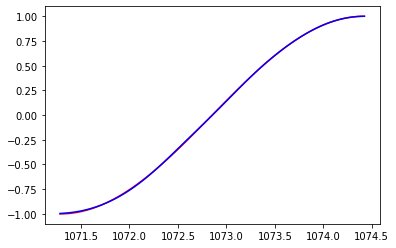

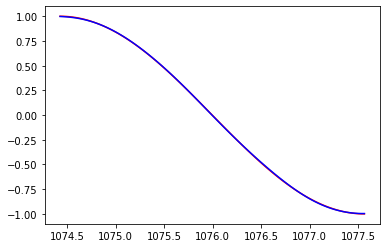

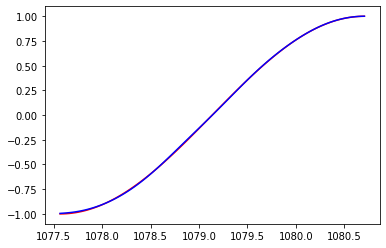

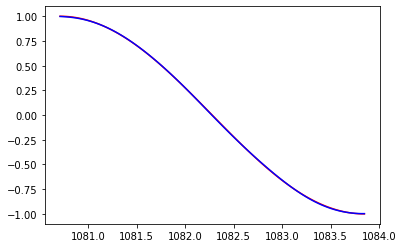

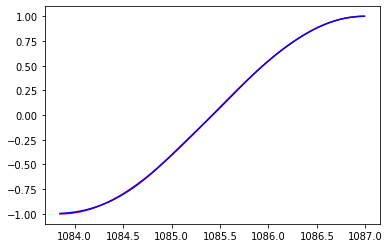

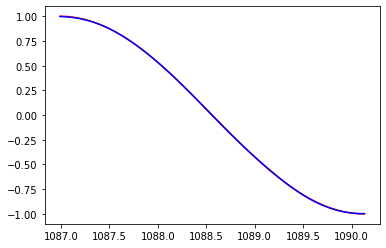

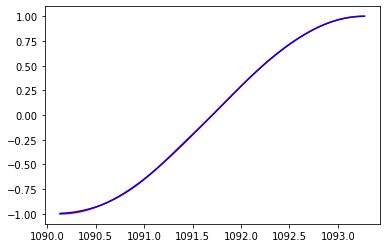

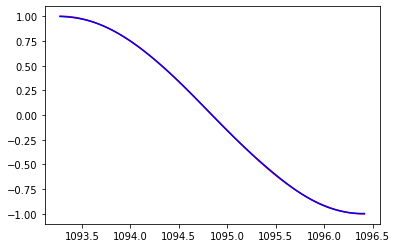

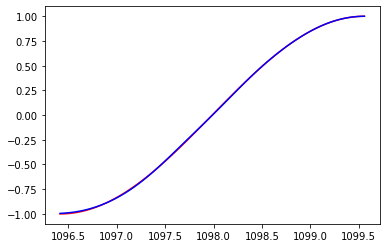

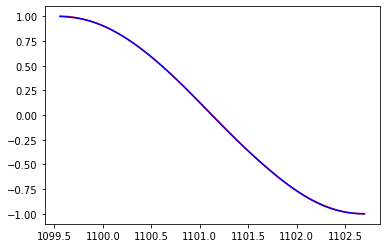

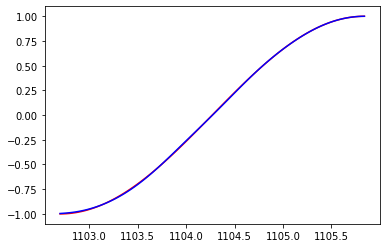

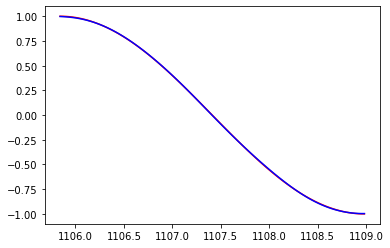

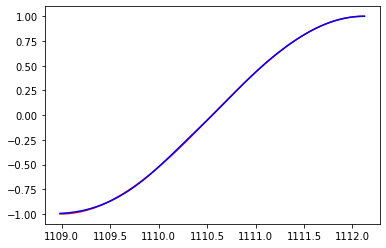

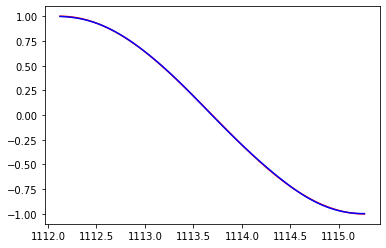

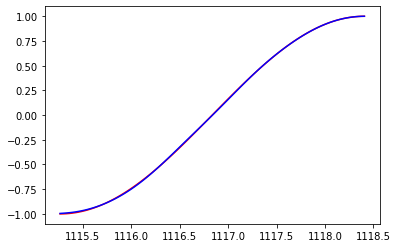

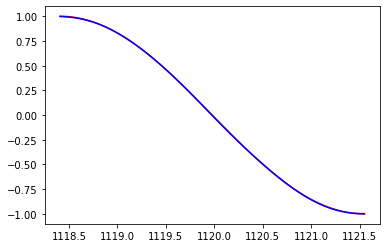

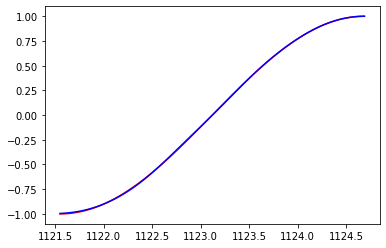

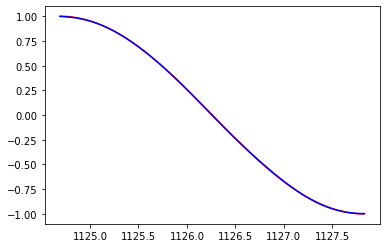

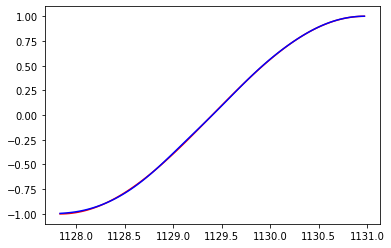

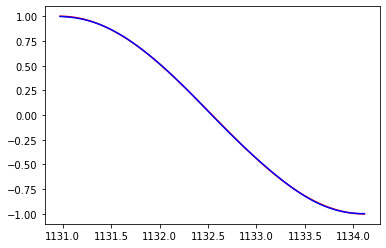

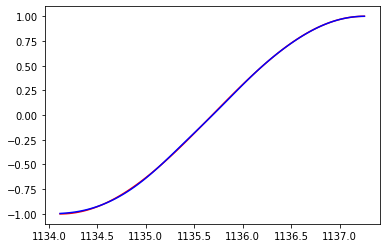

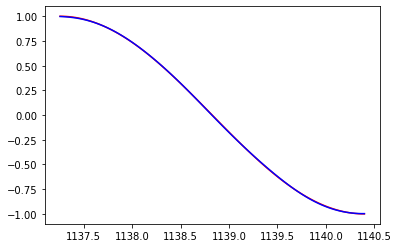

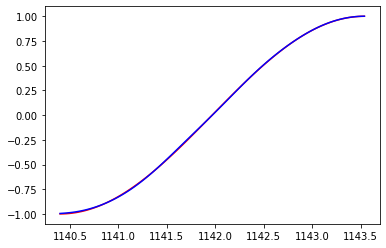

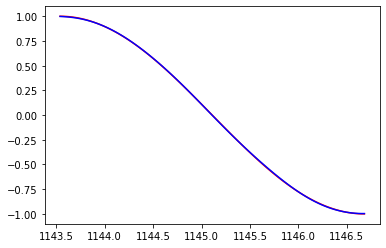

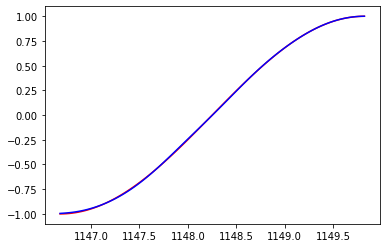

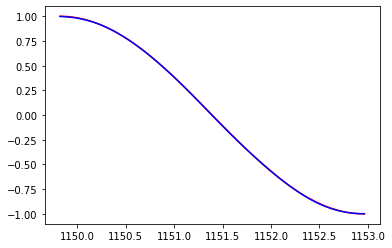

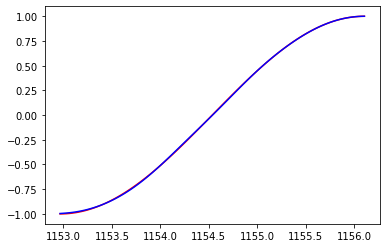

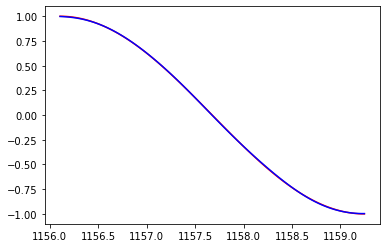

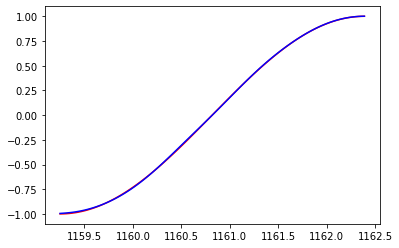

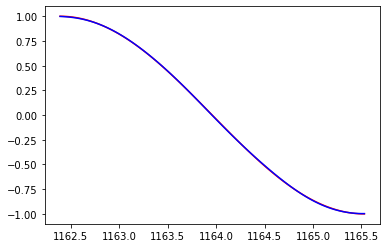

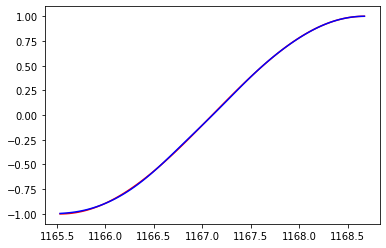

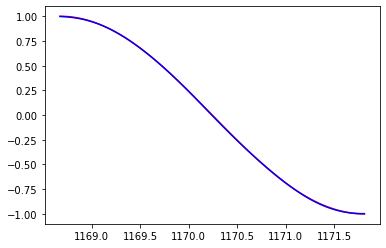

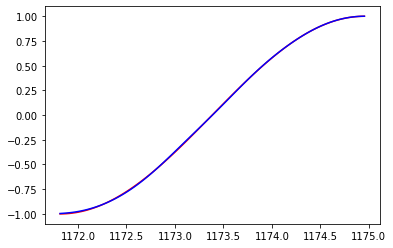

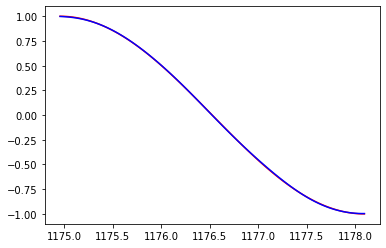

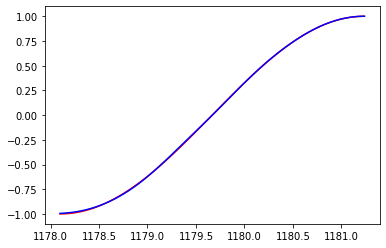

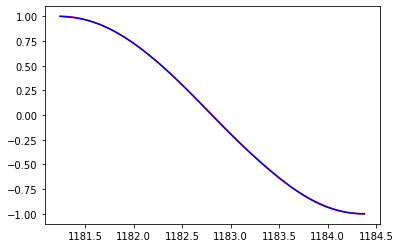

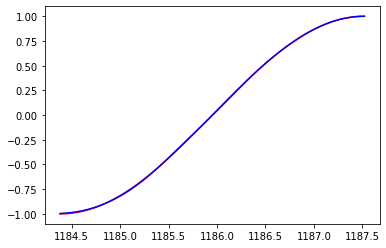

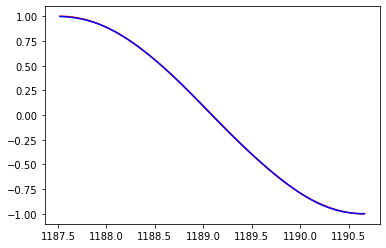

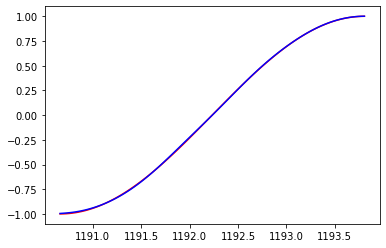

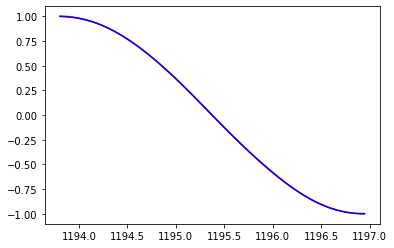

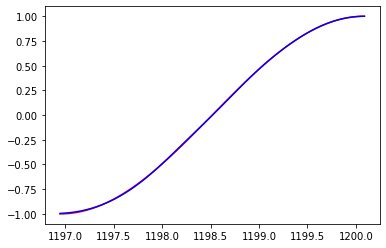

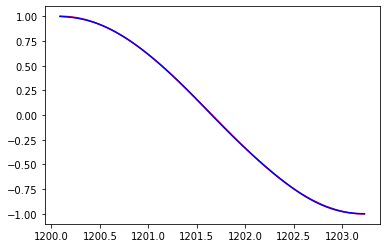

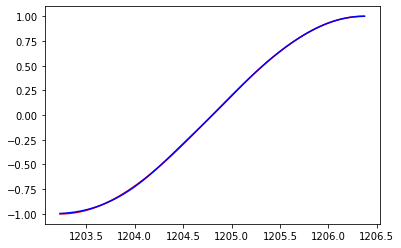

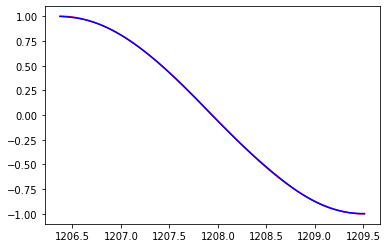

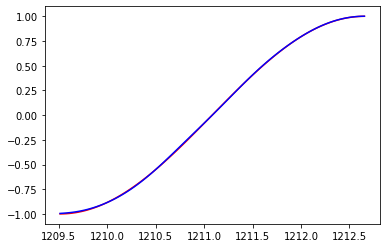

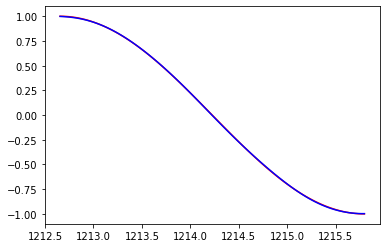

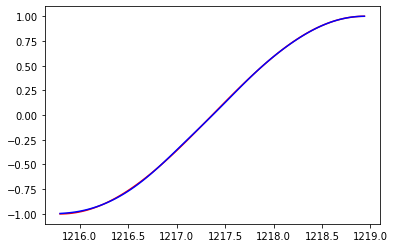

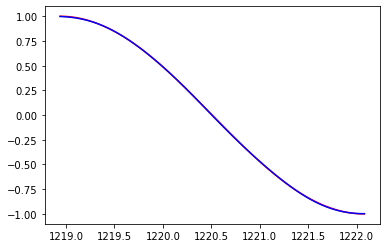

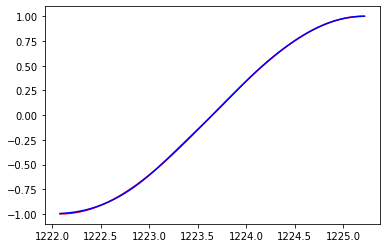

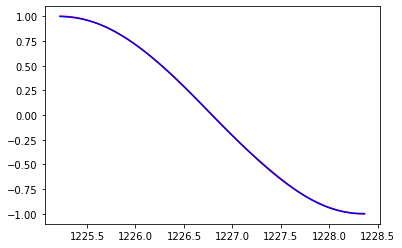

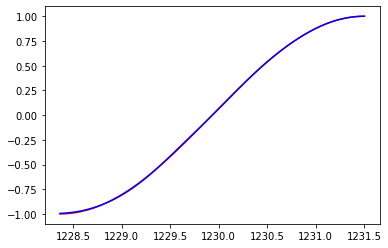

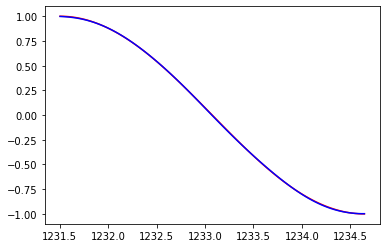

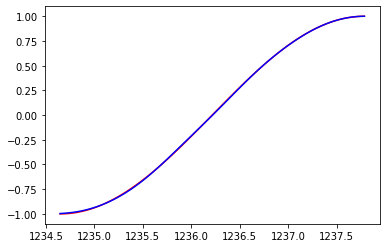

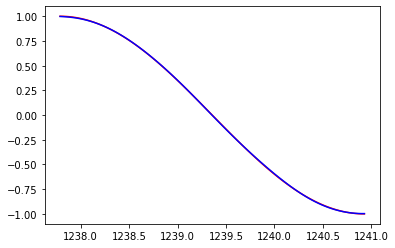

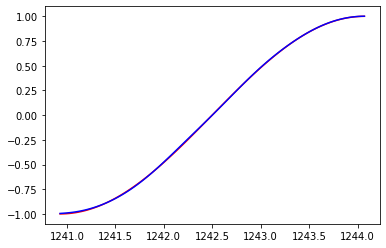

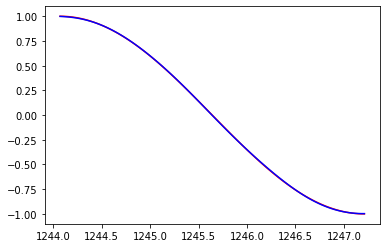

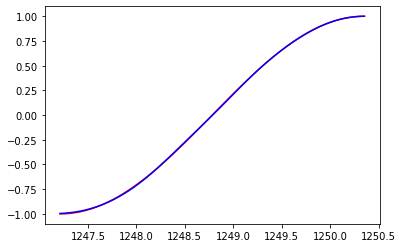

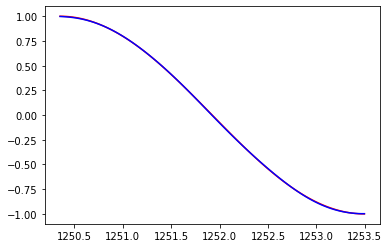

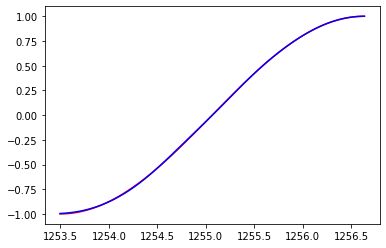

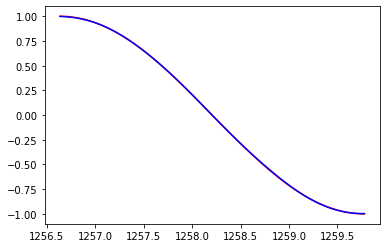

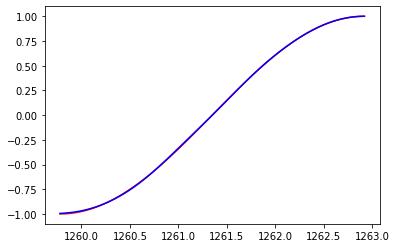

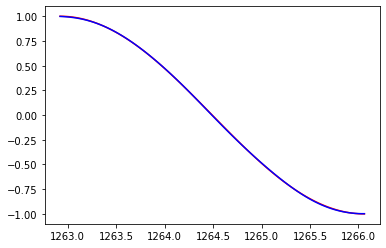

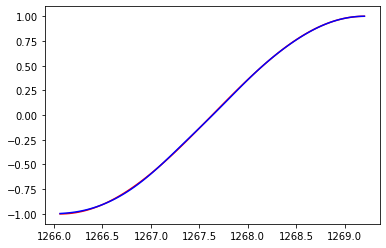

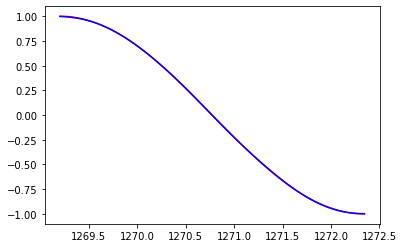

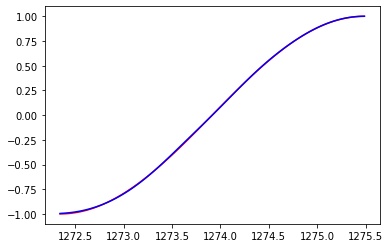

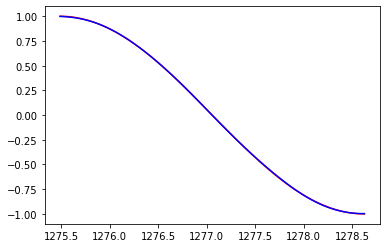

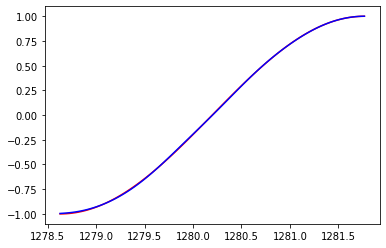

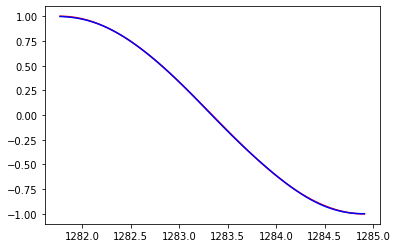

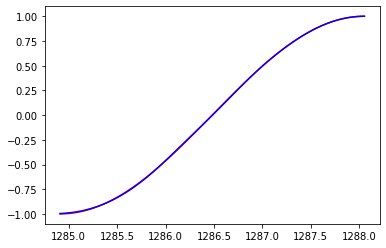

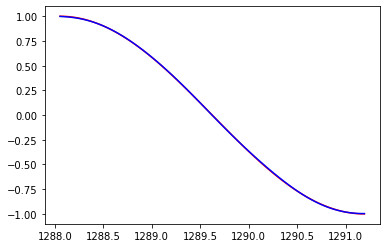

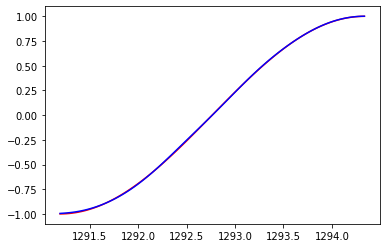

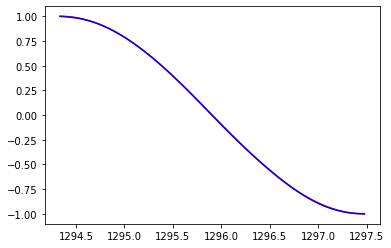

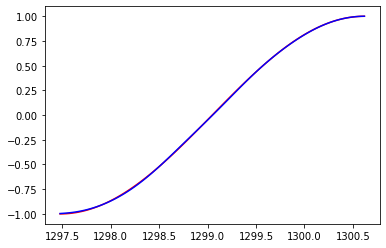

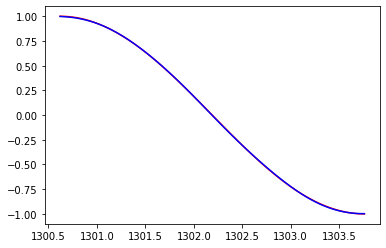

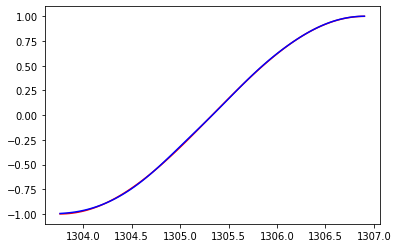

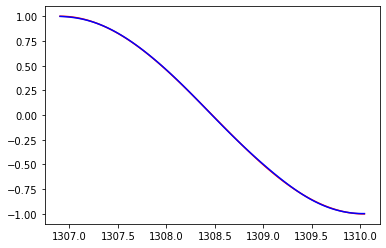

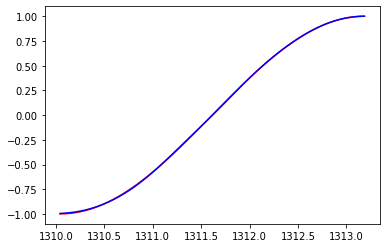

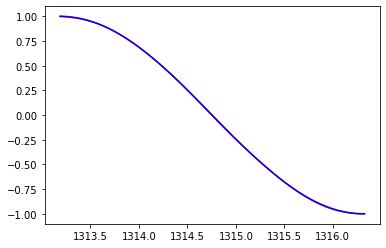

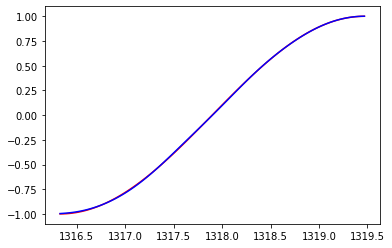

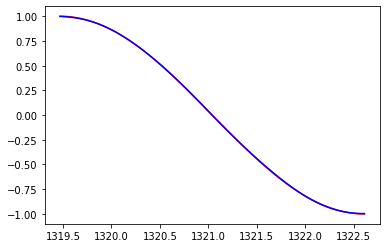

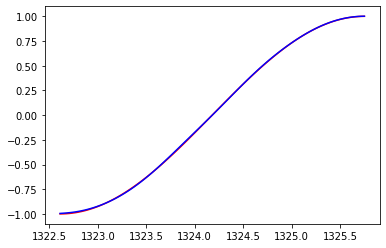

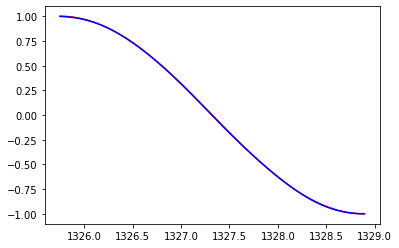

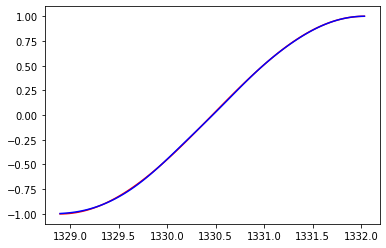

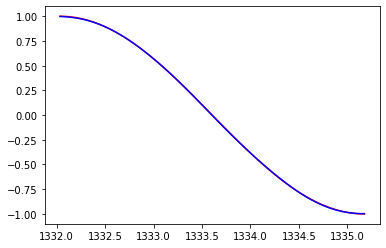

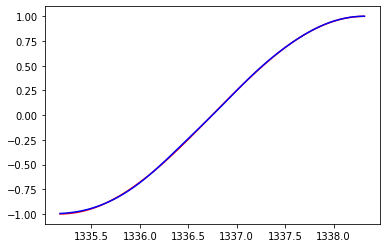

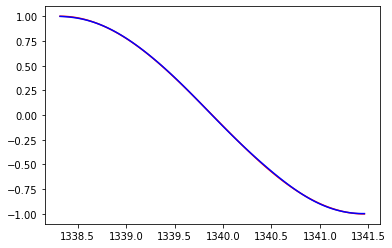

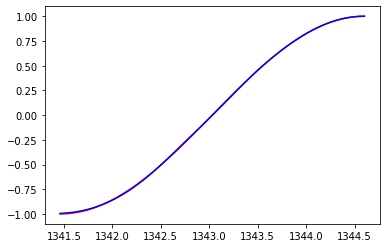

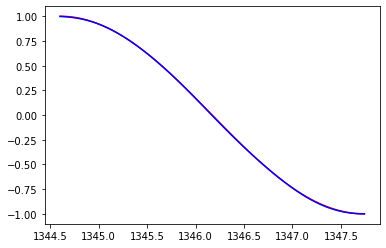

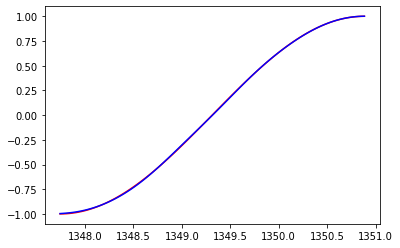

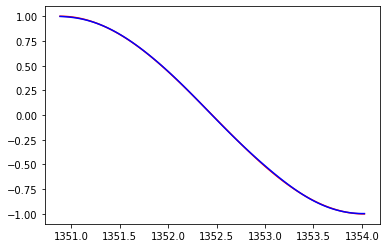

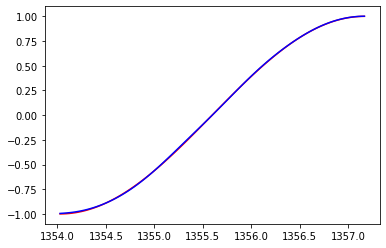

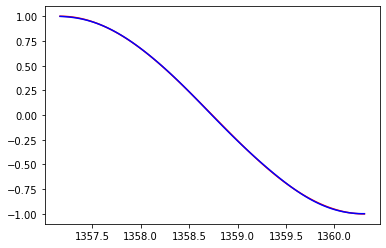

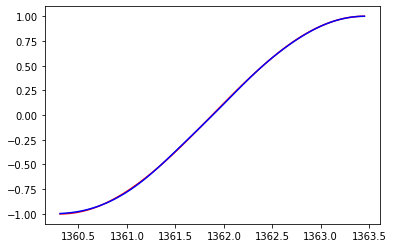

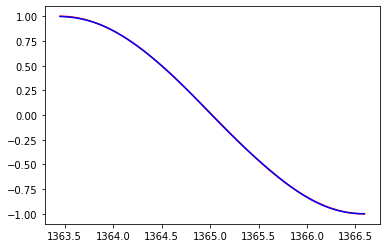

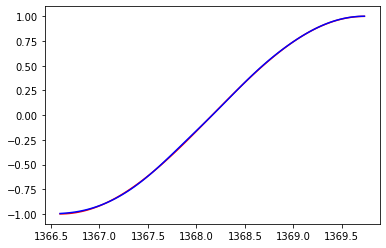

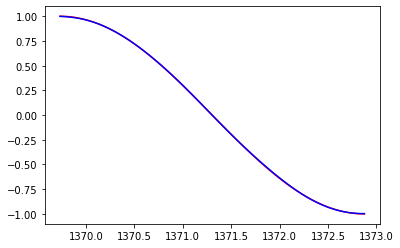

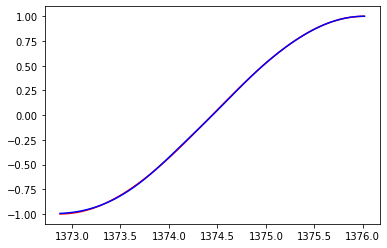

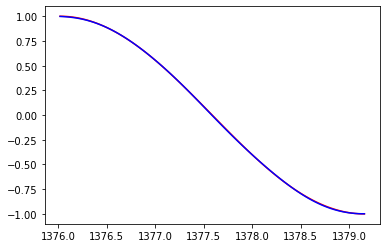

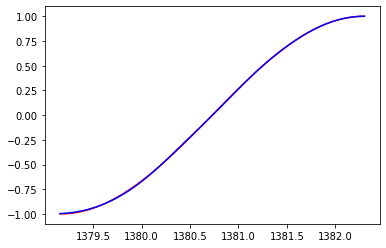

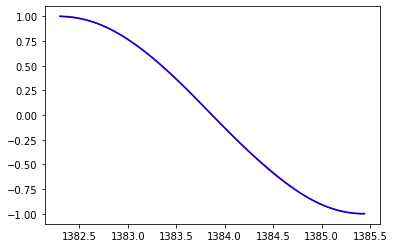

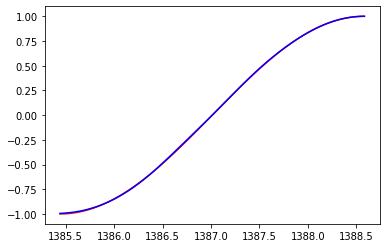

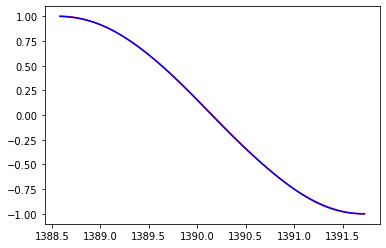

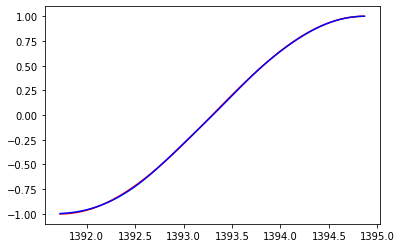

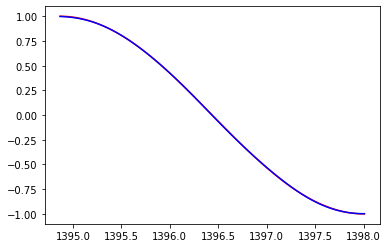

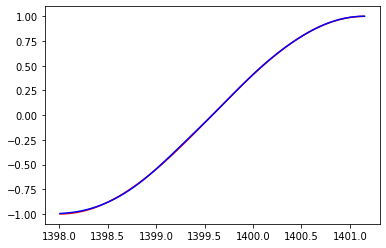

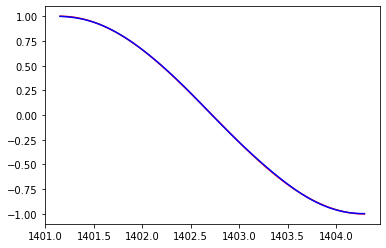

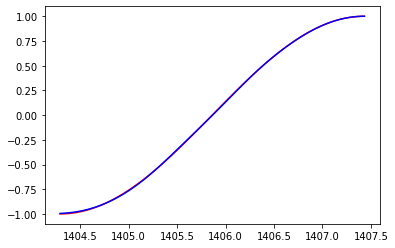

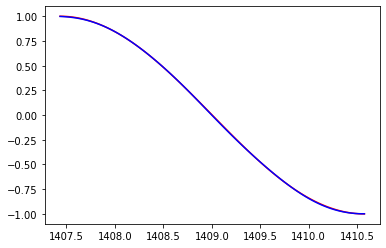

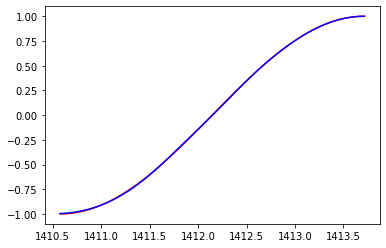

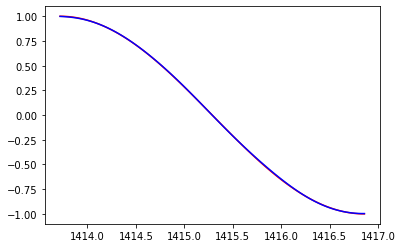

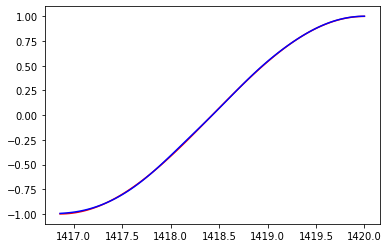

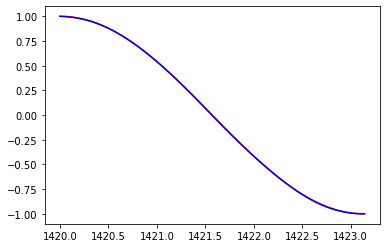

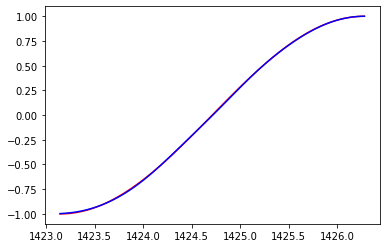

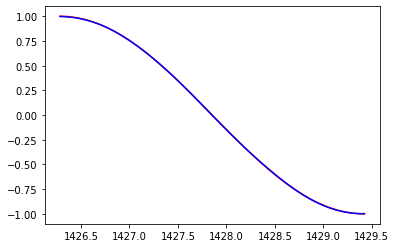

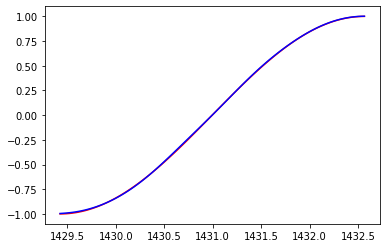

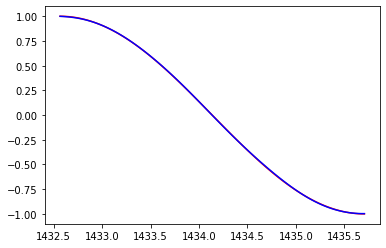

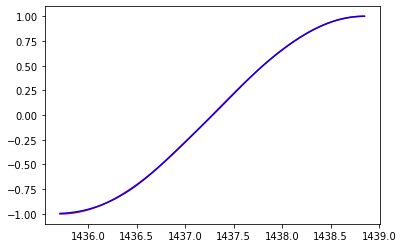

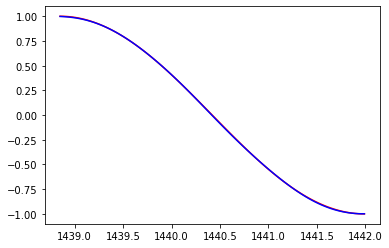

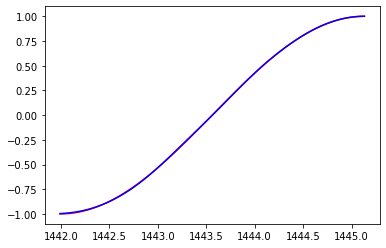

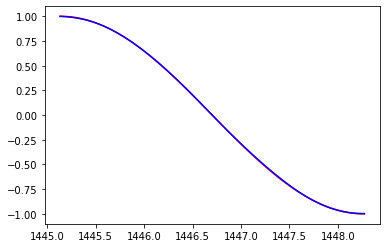

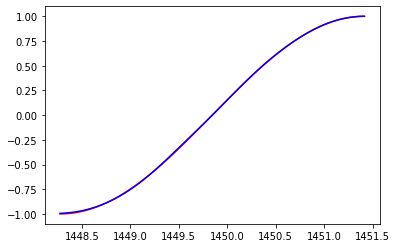

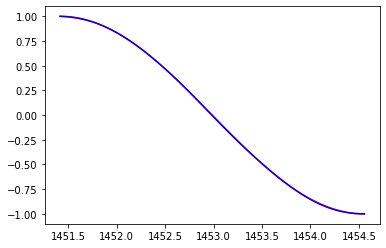

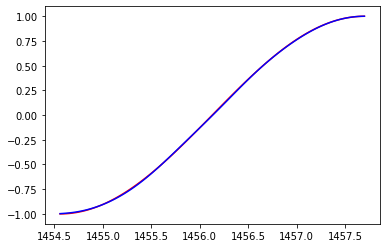

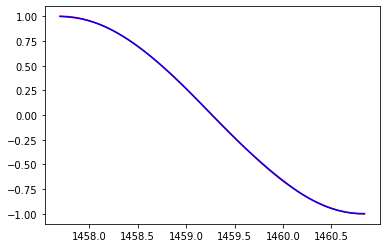

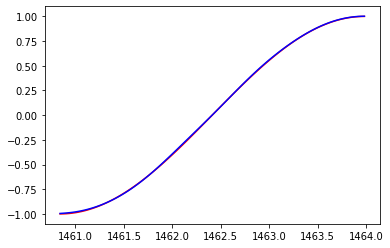

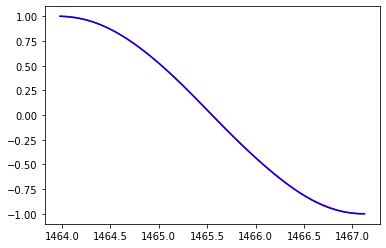

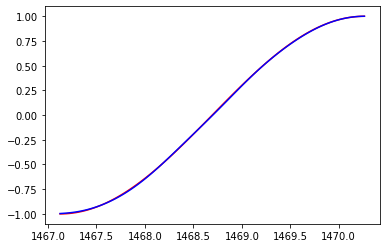

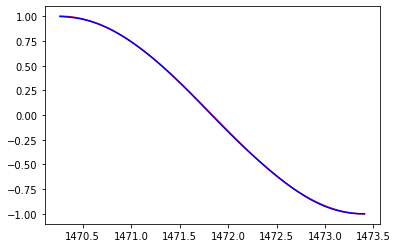

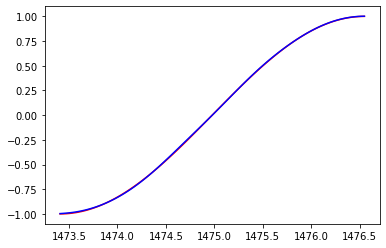

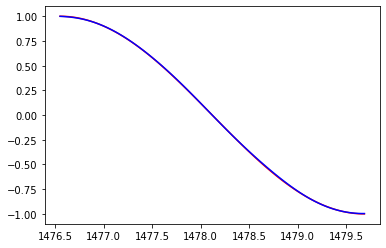

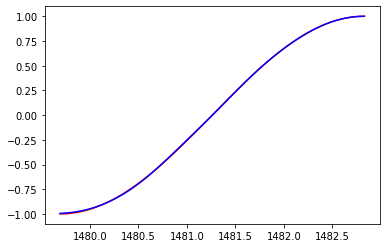

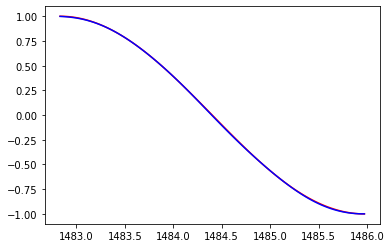

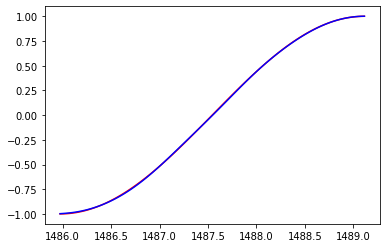

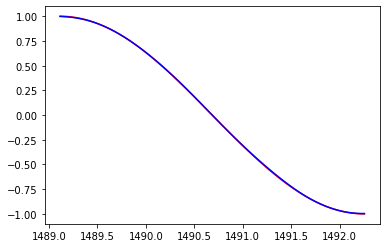

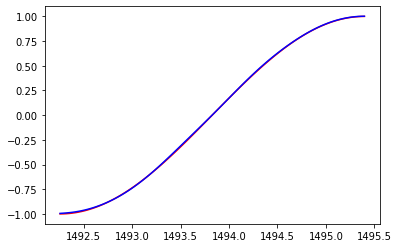

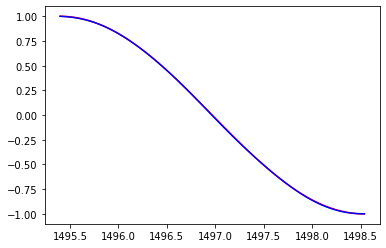

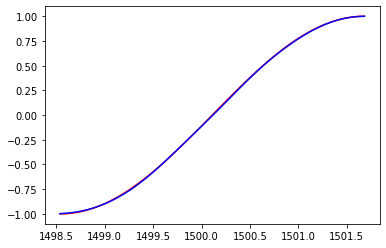

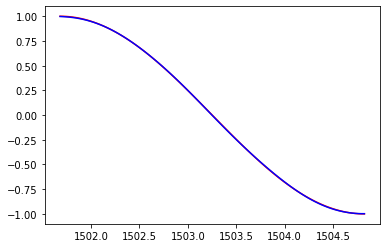

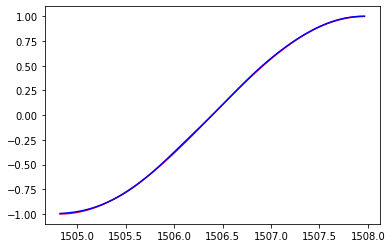

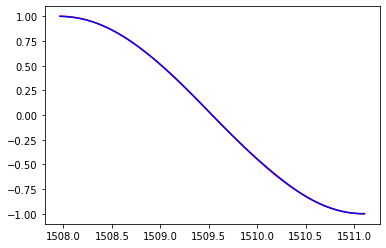

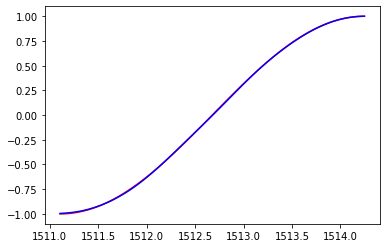

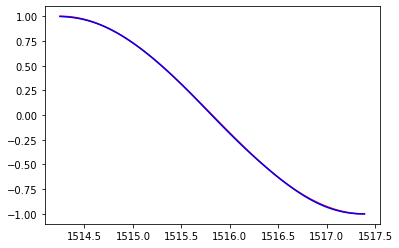

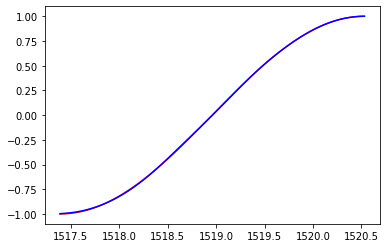

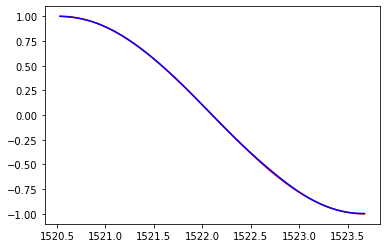

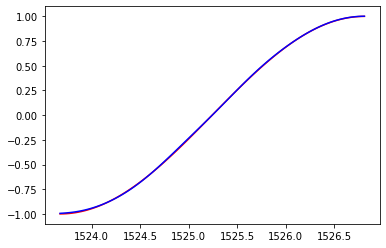

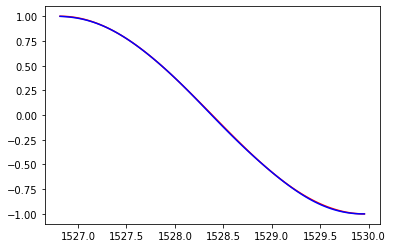

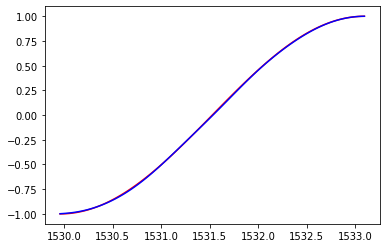

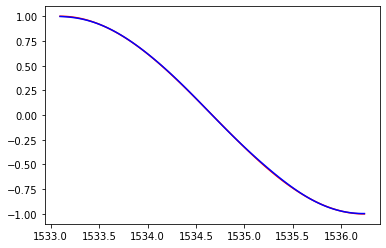

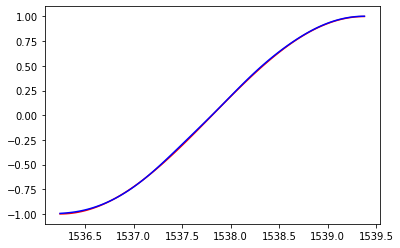

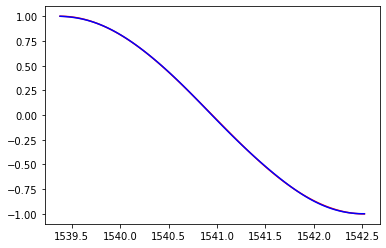

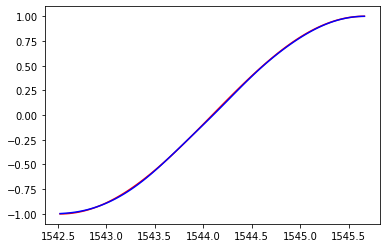

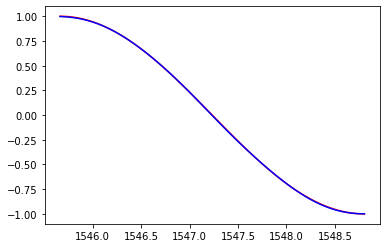

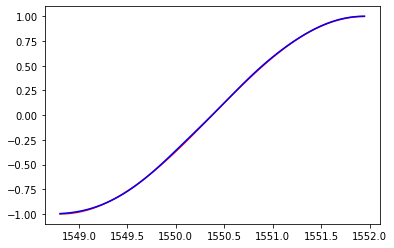

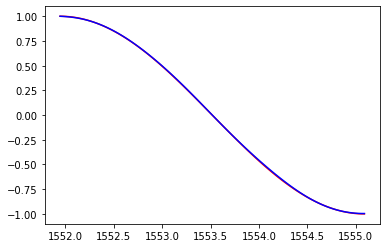

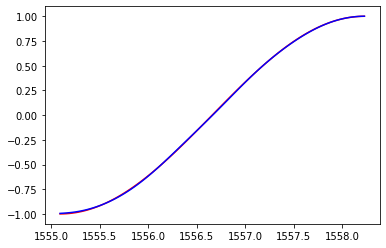

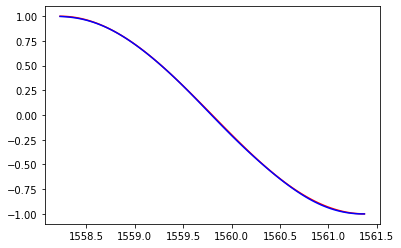

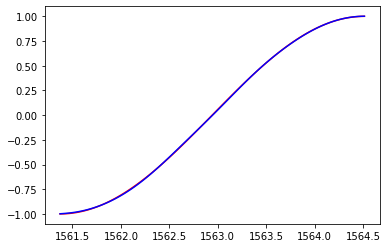

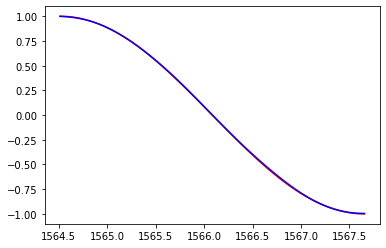

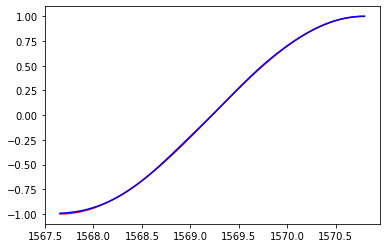

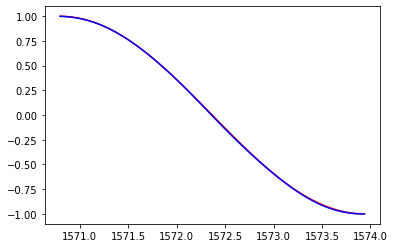

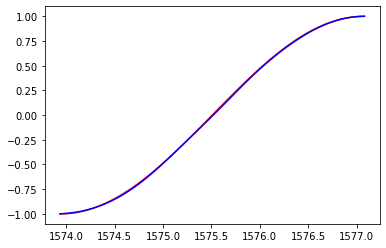

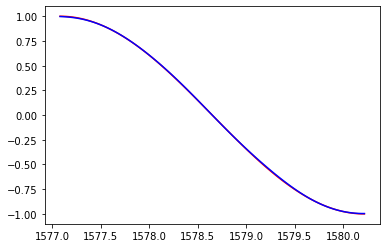

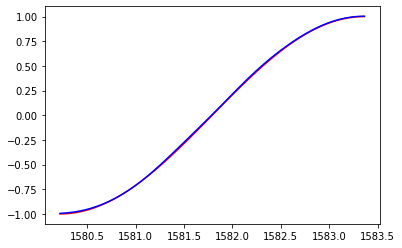

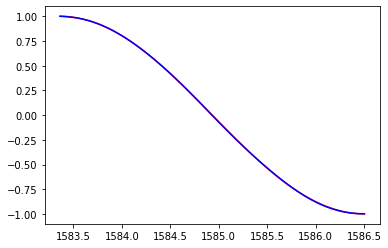

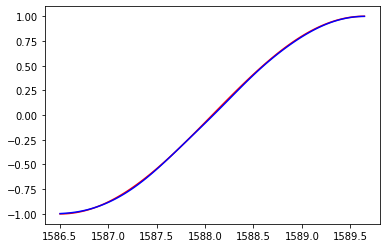

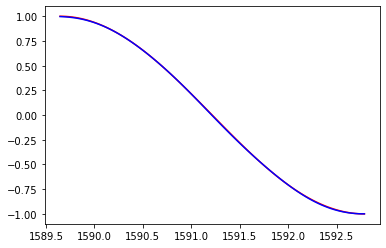

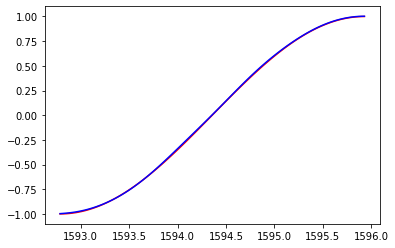

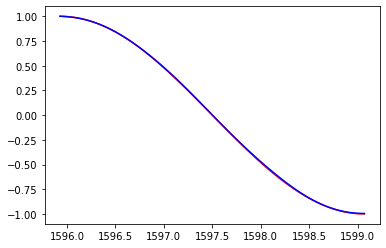

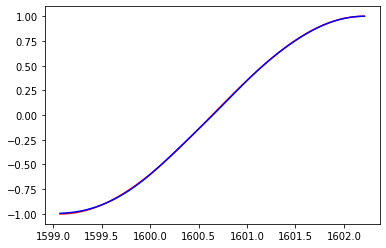

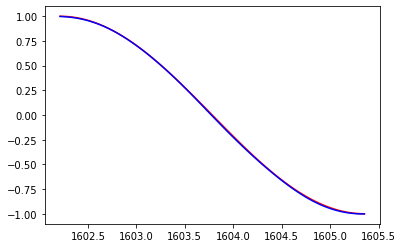

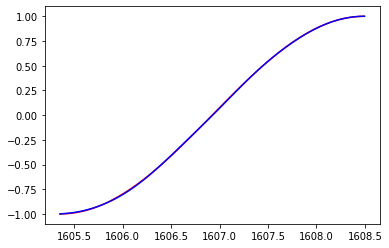

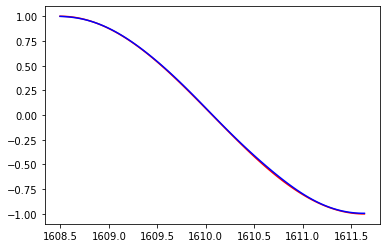

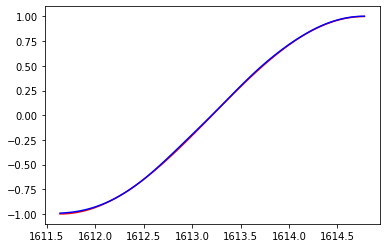

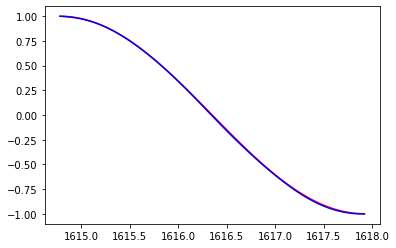

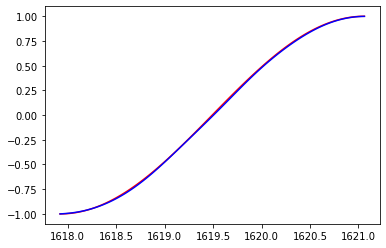

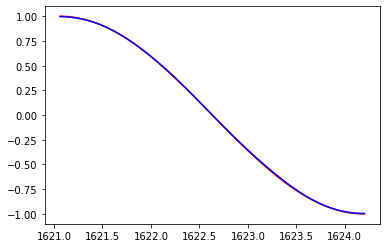

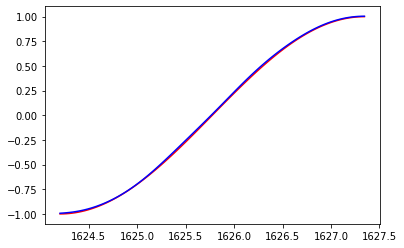

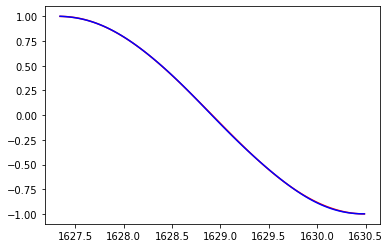

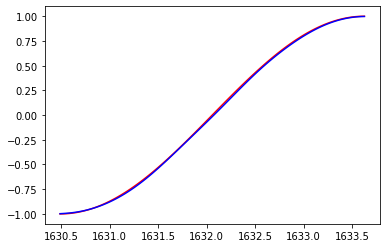

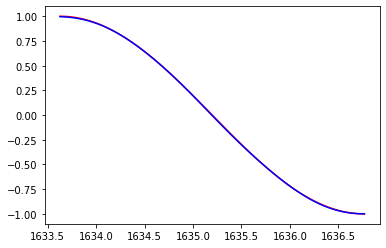

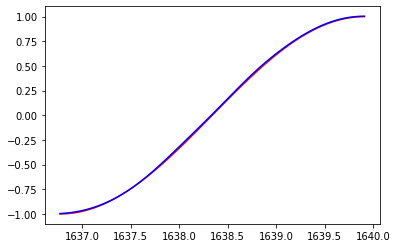

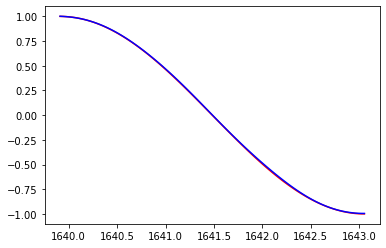

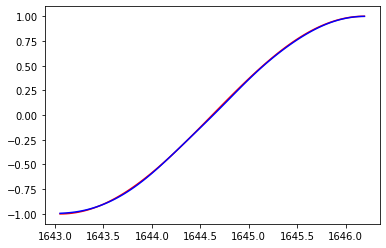

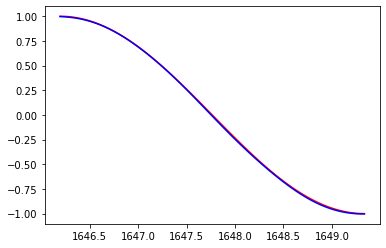

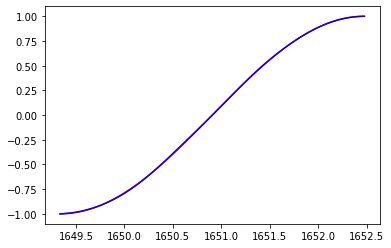

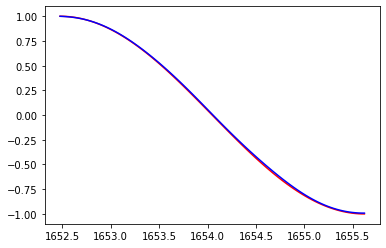

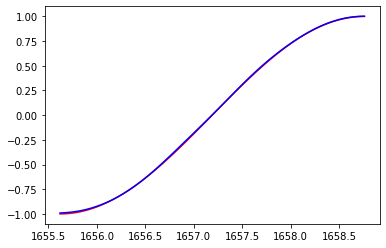

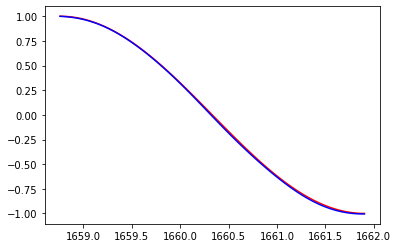

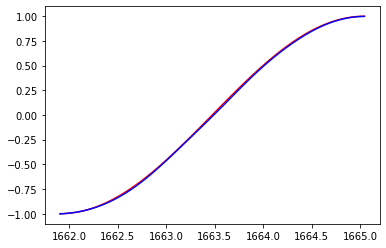

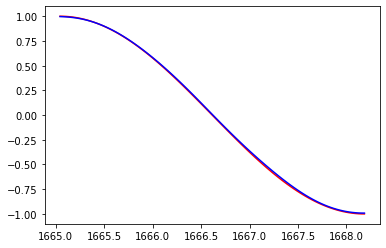

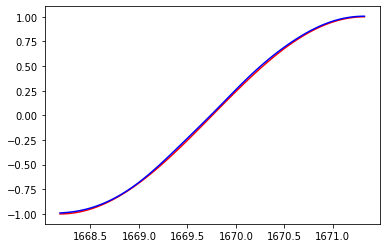

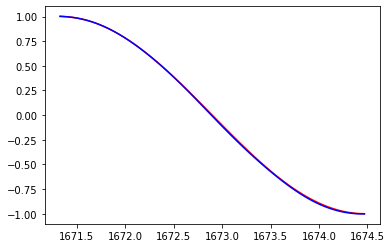

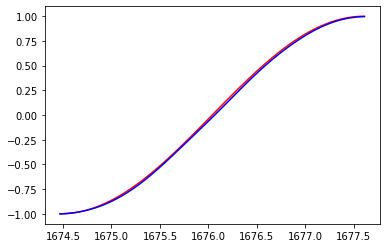

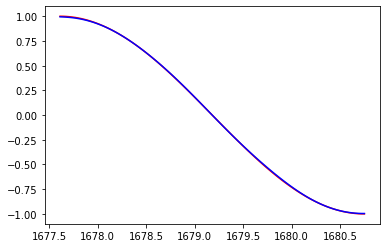

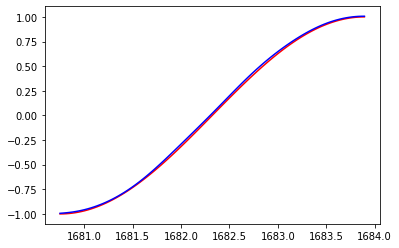

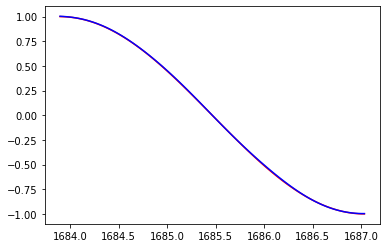

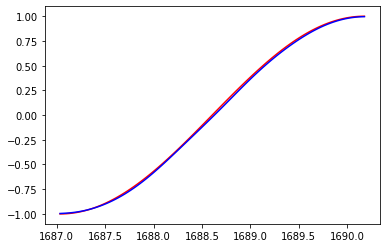

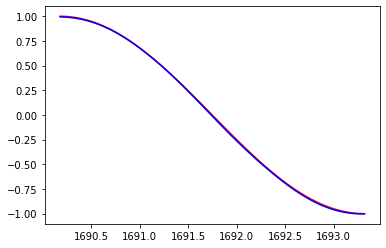

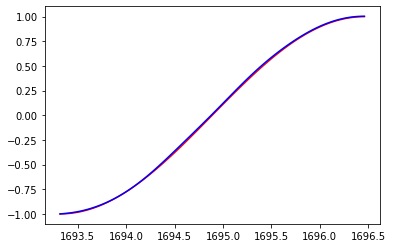

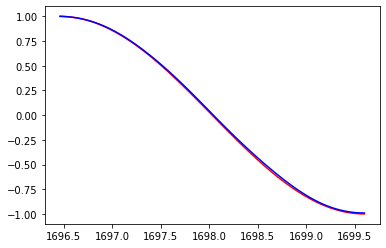

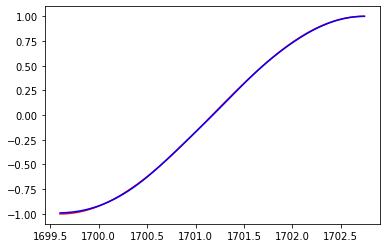

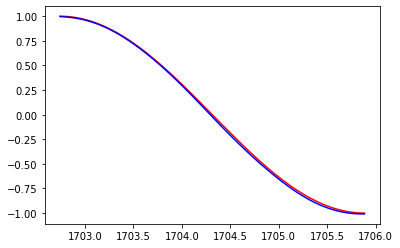

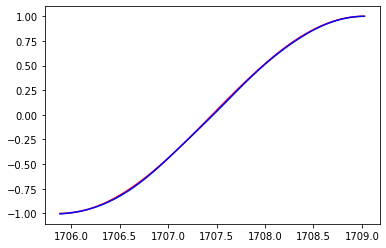

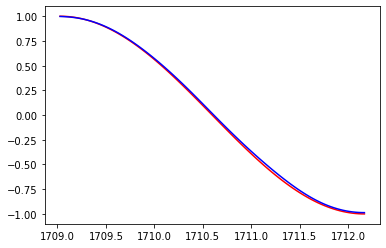

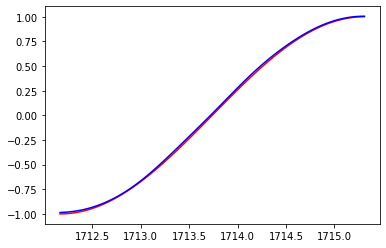

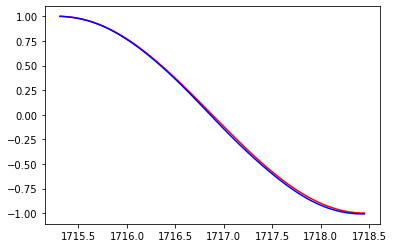

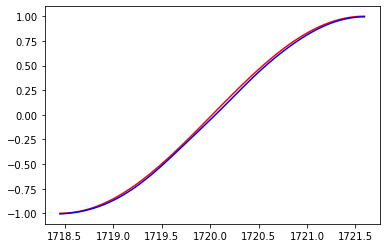

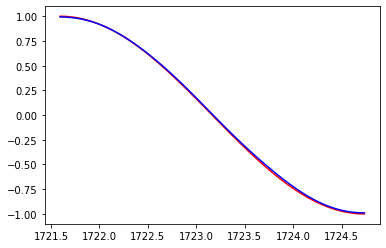

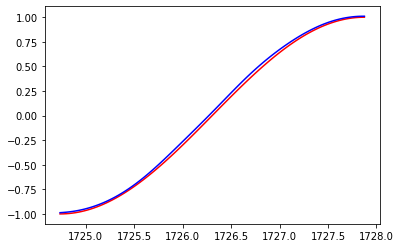

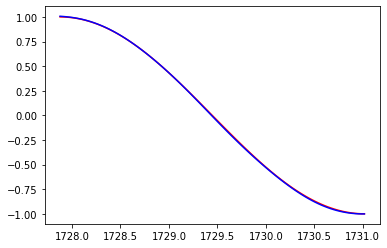

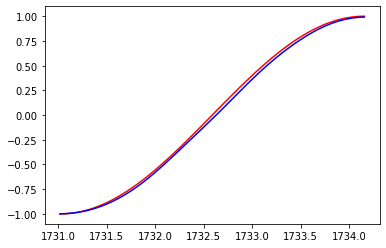

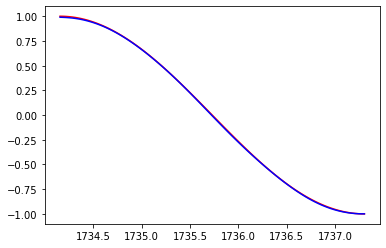

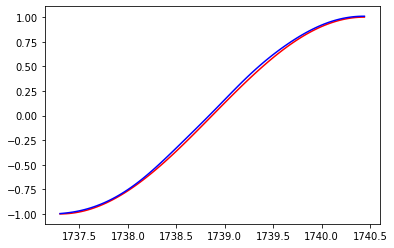

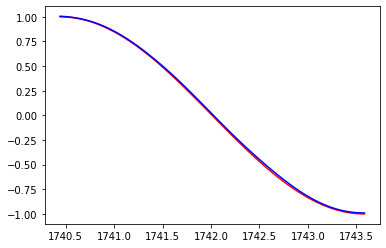

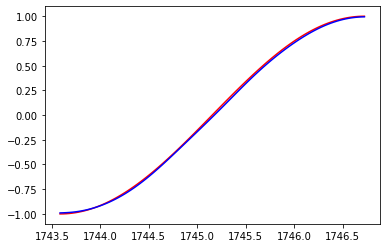

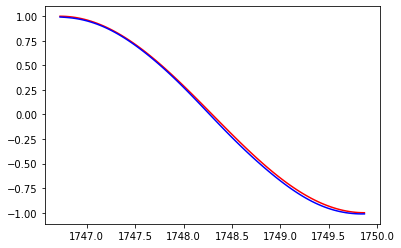

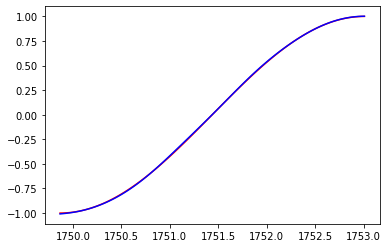

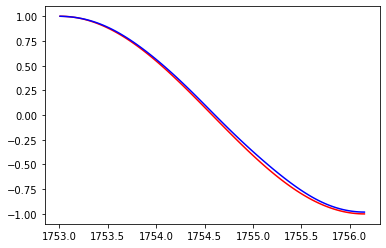

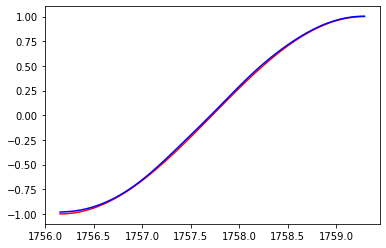

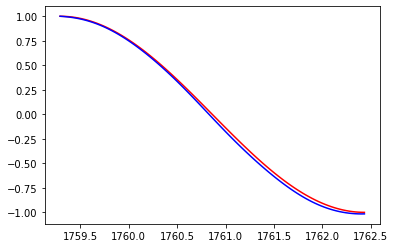

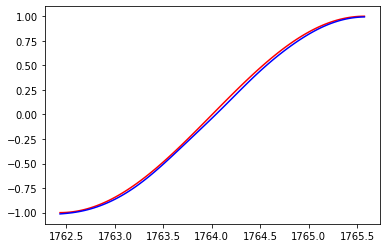

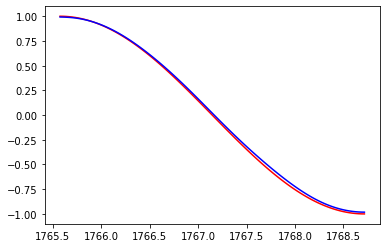

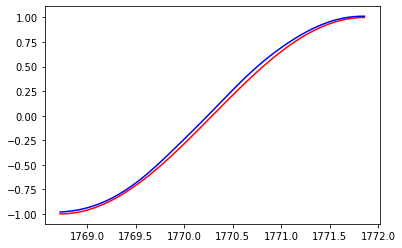

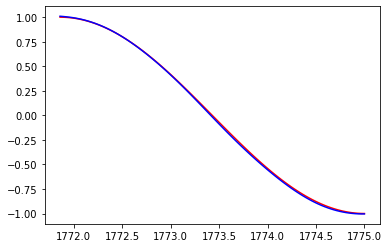

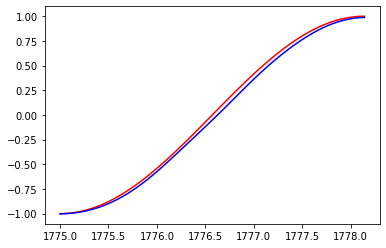

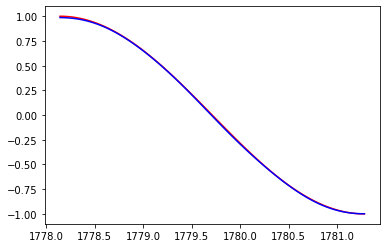

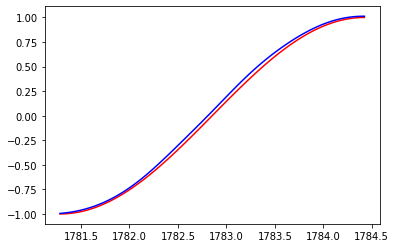

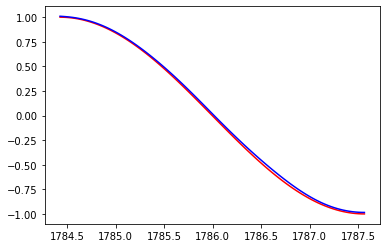

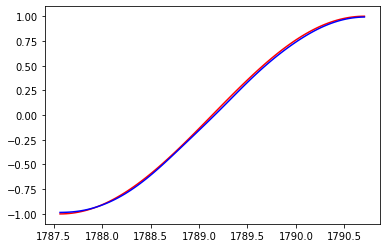

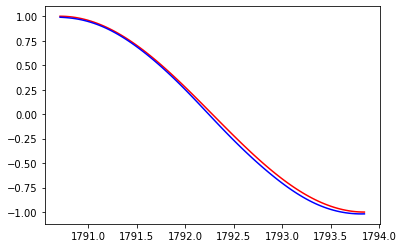

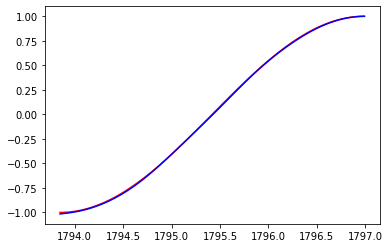

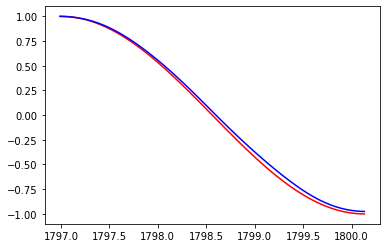

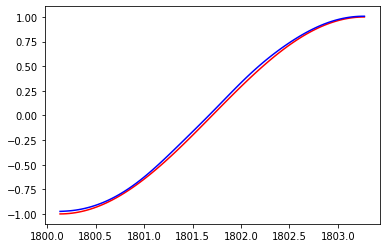

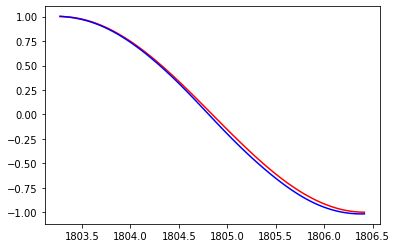

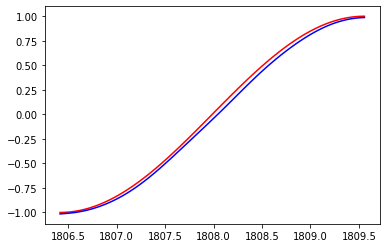

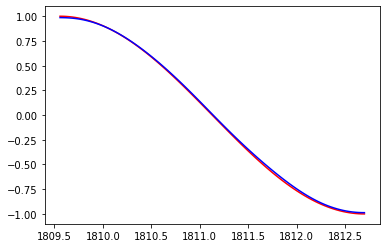

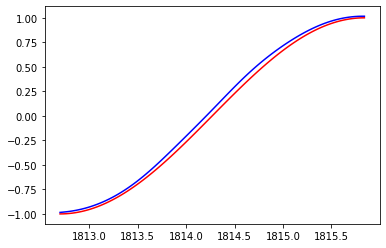

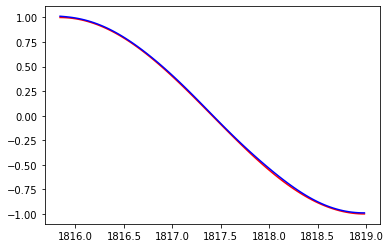

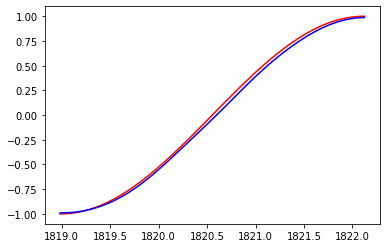

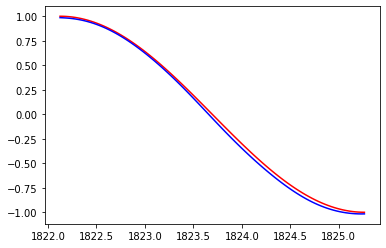

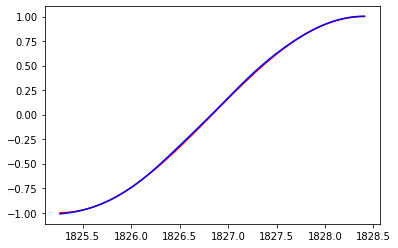

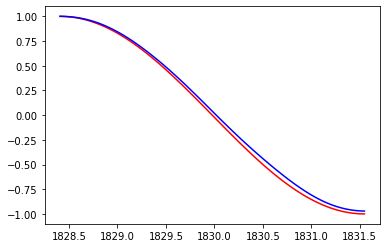

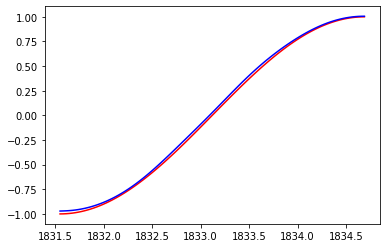

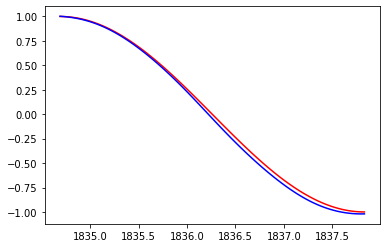

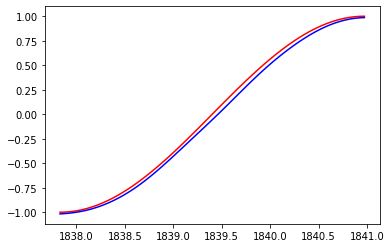

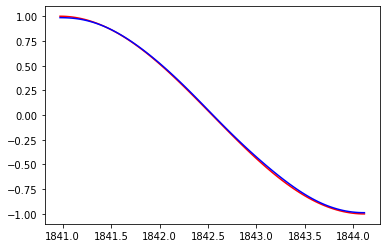

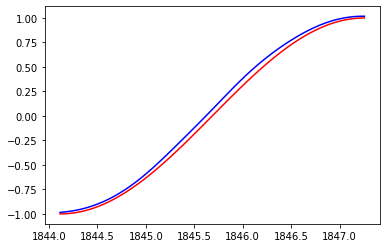

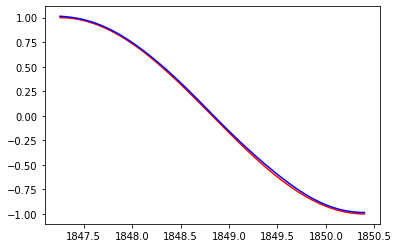

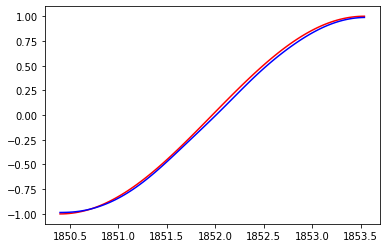

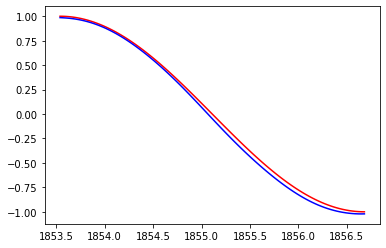

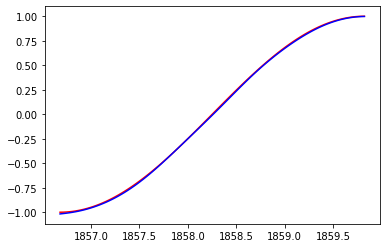

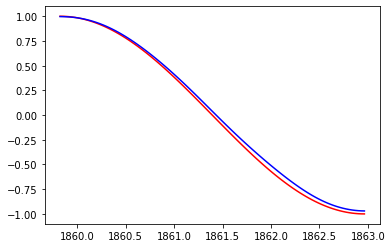

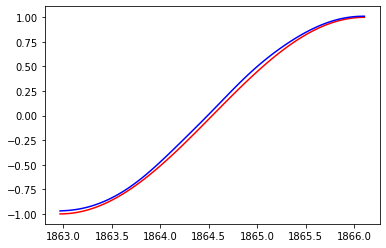

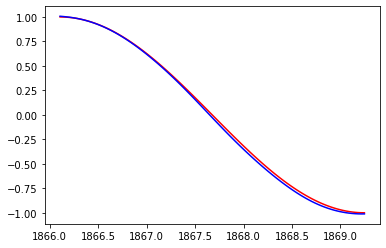

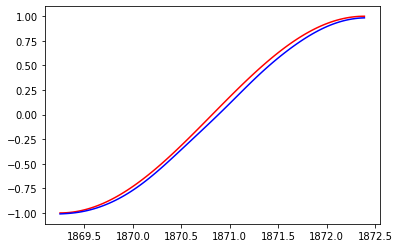

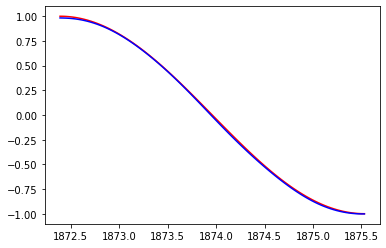

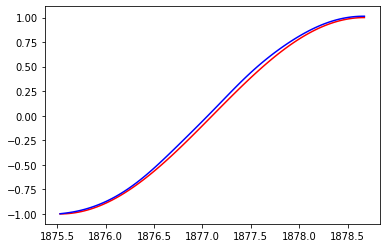

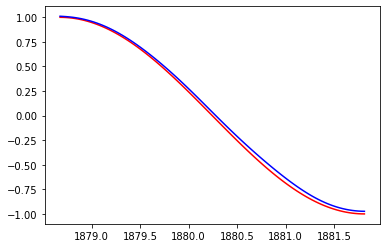

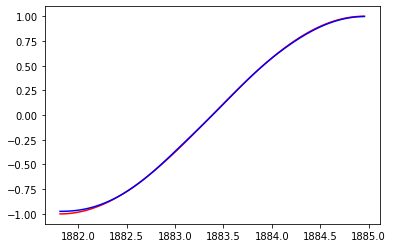

In [ ]:
for step in range(600):
  start,end = step*np.pi,(step+1)*np.pi
  steps = np.linspace(start,end,100,dtype=np.float32)
  x_np = np.sin(steps)
  y_np = np.cos(steps)

  x = torch.from_numpy(x_np).unsqueeze(0).unsqueeze(-1)
  y = torch.from_numpy(y_np).unsqueeze(0).unsqueeze(-1)
  prediction,(h_state,c_state) = lstm(x,h_state,c_state)
  h_state = h_state.data
  c_state = c_state.data
  loss_data = loss(prediction,y)
  optimizer.zero_grad()
  loss_data.backward()
  optimizer.step()

  plt.plot(steps,y_np.flatten(),'r-')
  plt.plot(steps,prediction.data.numpy().flatten(),'b-')
  plt.draw();plt.pause(0.05)
plt.ioff()
plt.show()

In [ ]:
!ls

sample_data


In [ ]:
!git clone https://github.com/OpenNMT/OpenNMT-py

Cloning into 'OpenNMT-py'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 16614 (delta 10), reused 10 (delta 4), pack-reused 16579
Receiving objects: 100% (16614/16614), 198.21 MiB | 19.79 MiB/s, done.
Resolving deltas: 100% (12005/12005), done.


In [ ]:
!ls

OpenNMT-py  sample_data


In [ ]:
!cd OpenNMT-py/

In [ ]:
!ls

OpenNMT-py  sample_data


In [ ]:
!ls -al

total 20
drwxr-xr-x  1 root root 4096 Oct 30 12:33 .
drwxr-xr-x  1 root root 4096 Oct 30 11:19 ..
drwxr-xr-x  1 root root 4096 Oct 28 16:30 .config
drwxr-xr-x 10 root root 4096 Oct 30 12:33 OpenNMT-py
drwxr-xr-x  1 root root 4096 Oct 28 16:30 sample_data


In [ ]:
!cd OpenNMT-py

In [ ]:
!pwd

/content


In [ ]:
!ls OpenNMT-py/

available_models  floyd_requirements.txt		    server.py
CHANGELOG.md	  floyd.yml				    setup.py
config		  github_deploy_key_opennmt_opennmt_py.enc  tools
CONTRIBUTING.md   LICENSE.md				    train.py
data		  onmt					    translate.py
docs		  README.md
examples	  requirements.opt.txt


In [ ]:
!pip install -r OpenNMT-py/requirements.opt.txt

  Cloning git://github.com/NVIDIA/apex.git (to revision 700d6825e205732c1d6be511306ca4e595297070) to /tmp/pip-req-build-l5kjk3rb
  Running command git clone -q git://github.com/NVIDIA/apex.git /tmp/pip-req-build-l5kjk3rb
  Running command git checkout -q 700d6825e205732c1d6be511306ca4e595297070
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 3.3MB 2.7MB/s 
     |████████████████████████████████| 20.2MB 11.8MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 1.1MB 43.0MB/s 
  Created wheel for pyrouge: filename=pyrouge-0.1.3-cp36-none-any.whl size=191613 sha256=9f6f4a2834a3843507b2e1e2e5f341248f121b4fd194326f229ae982a259953d
  Stored in directory: /root/.cache/pip/wheels/75/d3/0c/e5b04e15b6b87c42e980de3931d2686e14d36e045058983599
  Created wheel for apex: filename=apex-0.1-cp36-none-any.whl size=192741 sha256=1b6666151750fbea3d4ff5fd07a0d7cf987c55e07e5a38164318f3bdaf79f68d
  Stored in di